# 데이터 전처리

In [2]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False
rc('font', family='NanumGothic')

# 폰트 설정
!rm -rf ~/.cache/matplotlib/*

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'NanumGothic'

# 설정된 폰트 확인
print([f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name])

['NanumSquare_ac', 'Nanum Brush Script', 'NanumSquare_ac', 'NanumMyeongjo Eco', 'NanumSquareRound', 'NanumSquare', 'NanumSquare', 'NanumBarunpen', 'NanumSquare', 'NanumGothic', 'NanumGothicCoding', 'NanumGothicCoding', 'NanumMyeongjo Eco', 'NanumSquareRound', 'NanumSquareRound', 'NanumMyeongjo', 'NanumSquare', 'NanumBarunGothic', 'Nanum Pen Script', 'NanumMyeongjo Eco', 'NanumGothic', 'NanumMyeongjo Eco', 'NanumMyeongjo', 'NanumGothic Eco', 'NanumGothic', 'NanumBarunGothic', 'NanumSquare_ac', 'NanumGothic', 'NanumBarunGothic YetHangul', 'NanumSquare_ac', 'NanumGothic Eco', 'NanumBarunGothic', 'NanumMyeongjo', 'NanumBarunGothic', 'NanumSquareRound', 'NanumBarunpen', 'NanumGothic Eco', 'NanumMyeongjo YetHangul', 'NanumGothic Eco']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/제로베이스/파이널 프로젝트/통신사 데이터/Telco_customer_churn_cleaned.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Yes,0.0,0,20.94,129.09,1,Churned,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,0.0,0,18.24,169.89,2,Churned,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.0,0,97.20,917.70,3,Churned,Other
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,0.0,0,136.92,3182.97,3,Churned,Other
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.0,0,2172.17,7208.47,1,Churned,Competitor


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customerID                         7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   SeniorCitizen                      7043 non-null   int64  
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   tenure                             7043 non-null   int64  
 6   PhoneService                       7043 non-null   object 
 7   MultipleLines                      7043 non-null   object 
 8   InternetService                    7043 non-null   object 
 9   OnlineSecurity                     7043 non-null   object 
 10  OnlineBackup                       7043 non-null   object 
 11  DeviceProtection                   7043 non-null   objec

## 중복컬럼 삭제

In [ ]:
df = df[['Satisfaction Score',
    'Dependents', 'tenure', 'PhoneService', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'TotalCharges', 'churn_rate', 'CLTV', 'Age', 'Married',
    'Number of Referrals', 'Avg Monthly GB Download', 'Streaming Music',
    'Unlimited Data', 'Total Refunds', 'Total Extra Data Charges',
    'Total Long Distance Charges']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Satisfaction Score           7043 non-null   int64  
 1   Dependents                   7043 non-null   object 
 2   tenure                       7043 non-null   int64  
 3   PhoneService                 7043 non-null   object 
 4   InternetService              7043 non-null   object 
 5   OnlineSecurity               7043 non-null   object 
 6   OnlineBackup                 7043 non-null   object 
 7   DeviceProtection             7043 non-null   object 
 8   TechSupport                  7043 non-null   object 
 9   StreamingTV                  7043 non-null   object 
 10  StreamingMovies              7043 non-null   object 
 11  Contract                     7043 non-null   object 
 12  PaperlessBilling             7043 non-null   object 
 13  PaymentMethod     

In [ ]:
df = df[df['Satisfaction Score'] == 3]
df = df[df.columns.difference(['Satisfaction Score'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 2 to 7039
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          2665 non-null   int64  
 1   Avg Monthly GB Download      2665 non-null   int64  
 2   CLTV                         2665 non-null   int64  
 3   Contract                     2665 non-null   object 
 4   Dependents                   2665 non-null   object 
 5   DeviceProtection             2665 non-null   object 
 6   InternetService              2665 non-null   object 
 7   Married                      2665 non-null   object 
 8   Number of Referrals          2665 non-null   int64  
 9   OnlineBackup                 2665 non-null   object 
 10  OnlineSecurity               2665 non-null   object 
 11  PaperlessBilling             2665 non-null   object 
 12  PaymentMethod                2665 non-null   object 
 13  PhoneService           

## OneHot_encoding
- 논리형은 수치형으로 바꿔줘야됨
    - 바꾸는김에 모든컬럼 float로 변환

In [ ]:
df = pd.get_dummies(df)
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 2 to 7039
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      2665 non-null   float64
 1   Avg Monthly GB Download                  2665 non-null   float64
 2   CLTV                                     2665 non-null   float64
 3   Number of Referrals                      2665 non-null   float64
 4   Total Extra Data Charges                 2665 non-null   float64
 5   Total Long Distance Charges              2665 non-null   float64
 6   Total Refunds                            2665 non-null   float64
 7   TotalCharges                             2665 non-null   float64
 8   churn_rate                               2665 non-null   float64
 9   tenure                                   2665 non-null   float64
 10  Contract_Month-to-month                  2665 non-nul

In [ ]:
# df.to_csv('df.csv', index=False)

## 상관관계 높은 컬럼만 선정
- 다중공선성이 높은 컬럼의 영향을 받는 모델은 **Rogistic Regression**
- Label encoder의 영향을 받는 모델도 **Rogistic Regression**

#### 상관행렬

In [ ]:
corr_matrix = df.corr()
corr_matrix

,Age,Avg Monthly GB Download,CLTV,Number of Referrals,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,churn_rate,tenure,...,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Unlimited Data_No,Unlimited Data_Yes
Age,1.000000,-0.397199,0.034310,-0.017041,0.032010,0.002109,0.018018,0.067937,0.096658,0.037390,...,-0.099780,0.068697,0.034274,-0.099780,0.046363,0.126401,-0.099780,-0.049229,-0.059059,0.059059
Avg Monthly GB Download,-0.397199,1.000000,0.028844,0.073827,0.091856,0.035498,-0.010398,0.230535,-0.002396,0.074470,...,-0.511531,0.221363,0.202163,-0.511531,0.211012,0.191655,-0.511531,0.224799,-0.378508,0.378508
CLTV,0.034310,0.028844,1.000000,0.097395,0.062817,0.272470,-0.015645,0.368825,-0.107746,0.417231,...,-0.048553,0.138065,-0.082562,-0.048553,0.122617,-0.083121,-0.048553,0.127273,-0.014791,0.014791
Number of Referrals,-0.017041,0.073827,0.097395,1.000000,0.002641,0.227588,0.013191,0.269739,-0.255420,0.306824,...,-0.032048,0.078879,-0.077214,-0.032048,0.103840,-0.097801,-0.032048,0.128904,-0.053537,0.053537
Total Extra Data Charges,0.032010,0.091856,0.062817,0.002641,1.000000,0.047627,0.022096,0.122266,0.000656,0.092413,...,-0.134151,0.078612,0.040643,-0.134151,0.067816,0.021480,-0.134151,0.089051,0.417624,-0.417624
Total Long Distance Charges,0.002109,0.035498,0.272470,0.227588,0.047627,1.000000,0.013523,0.601622,-0.198937,0.646230,...,-0.035314,0.171299,-0.144330,-0.035314,0.174158,-0.163258,-0.035314,0.200064,-0.021294,0.021294
Total Refunds,0.018018,-0.010398,-0.015645,0.013191,0.022096,0.013523,1.000000,0.003192,-0.021501,0.029093,...,-0.002139,-0.009131,0.004047,-0.002139,-0.002346,-0.007828,-0.002139,0.009963,0.010353,-0.010353
TotalCharges,0.067937,0.230535,0.368825,0.269739,0.122266,0.601622,0.003192,1.000000,-0.220694,0.838002,...,-0.405887,0.499496,-0.168954,-0.405887,0.499512,-0.101826,-0.405887,0.443862,-0.289972,0.289972
churn_rate,0.096658,-0.002396,-0.107746,-0.255420,0.000656,-0.198937,-0.021501,-0.220694,1.000000,-0.330619,...,-0.104541,0.030099,0.064138,-0.104541,0.020114,0.264262,-0.104541,-0.189426,-0.058645,0.058645
tenure,0.037390,0.074470,0.417231,0.306824,0.092413,0.646230,0.029093,0.838002,-0.330619,1.000000,...,-0.112789,0.277907,-0.185280,-0.112789,0.278276,-0.239025,-0.112789,0.343689,-0.068705,0.068705


In [ ]:
threshold = 0.5

churn_corr = corr_matrix['churn_rate']
significant_corr = churn_corr[(abs(churn_corr) >= threshold) & (churn_corr.index != 'churn_rate')]
significant_corr

Series([], Name: churn_rate, dtype: float64)

In [ ]:
threshold = 0.3

churn_corr = corr_matrix['churn_rate']
significant_corr = churn_corr[(abs(churn_corr) >= threshold) & (churn_corr.index != 'churn_rate')]
significant_corr

tenure                    -0.330619
Contract_Month-to-month    0.318697
OnlineSecurity_No          0.431317
OnlineSecurity_Yes        -0.345128
Name: churn_rate, dtype: float64

#### 다중공선성 컬럼

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_df = calculate_vif(df.drop(['churn_rate'], axis=1))
vif_df[vif_df['VIF'] > 10]

,Variable,VIF
7,TotalCharges,11.966053
9,Contract_Month-to-month,inf
10,Contract_One year,inf
11,Contract_Two year,inf
12,Dependents_No,inf
13,Dependents_Yes,inf
14,DeviceProtection_No,inf
15,DeviceProtection_No internet service,inf
16,DeviceProtection_Yes,inf
17,InternetService_DSL,inf


- 일단 다중공선성이 높은 컬럼있는 상태로 진행
- 상관관계 높은 컬럼(0.3이상)
   - 'tenure', 'Contract_Month-to-month', 'OnlineSecurity_No', 'OnlineSecurity_Yes'

# 모델예측(ML)
- Rogistic Regression
- Descision Tree
- Random Forest
- XGBoost

## Satisfaction Score 점수가 3점인 사람들을 대상으로
- Robust Scale
- OverSampling

In [ ]:
numeric_features = ['tenure', 'TotalCharges', 'CLTV', 'Age', 'Number of Referrals', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']

In [ ]:
from sklearn.preprocessing import RobustScaler

df_scale = df.copy()

scaler = RobustScaler()
df_scale[numeric_features] = scaler.fit_transform(df_scale[numeric_features])

df_scale.head()

,Age,Avg Monthly GB Download,CLTV,Number of Referrals,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,churn_rate,tenure,...,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Unlimited Data_No,Unlimited Data_Yes
2,-0.518519,0.391304,0.403279,0.00,0.0,-0.321094,0.0,-0.261319,1.0,-0.562500,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.814815,1.304348,0.201639,0.00,0.0,-0.290023,0.0,0.323475,1.0,-0.145833,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,1.222222,-0.391304,0.436612,0.00,20.0,-0.397128,0.0,-0.466498,1.0,-0.708333,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,0.111111,0.043478,0.568306,0.00,0.0,-0.159898,0.0,-0.186457,1.0,-0.500000,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
16,1.074074,0.000000,0.365027,0.25,0.0,-0.091428,0.0,-0.310508,1.0,-0.562500,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X = df_scale[df_scale.columns.difference(['churn_rate'])]
y = df_scale['churn_rate']

In [ ]:
X.shape, y.shape

((2665, 49), (2665,))

#### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
												  test_size=0.2,
                                                  stratify=y,
												  random_state=13)

In [ ]:
X_train.shape, X_test.shape

((2132, 49), (533, 49))

#### SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((2132, 49), (2132,))

In [ ]:
X_train_over.shape, y_train_over.shape

((3578, 49), (3578,))

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0., 1.]), array([1789,  343]))
(array([0., 1.]), array([1789, 1789]))


#### 분류기 성능확인 함수

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = []

models.append(('LogisticRegression', LogisticRegression(random_state=13, solver='liblinear')))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=13)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=13, n_jobs=-1)))
models.append(('XGBClassifier', XGBClassifier(random_state=13, n_jobs=-1)))

#### 모델성능 확인
- StratifiedKFold(n_splits=5)
- 평가지표
    - acc
    - roc_auc

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

accuracy_mean = []
accuracy_std = []
roc_auc_mean = []
roc_auc_std = []

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
    # accuracy
    acc_results = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring='accuracy')
    accuracy_mean.append(acc_results.mean())
    accuracy_std.append(acc_results.std())

    # roc_auc
    auc_results = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring='roc_auc')
    roc_auc_mean.append(auc_results.mean())
    roc_auc_std.append(auc_results.std())

    results.append(acc_results)
    names.append(name)

col_names = ['Accuracy_mean', 'Accuracy_std', 'ROC AUC_mean', 'ROC AUC_std']
pd.DataFrame(data={
        'Accuracy_mean': accuracy_mean,
        'Accuracy_std': accuracy_std,
        'ROC AUC_mean': roc_auc_mean,
        'ROC AUC_std': roc_auc_std
    },
            columns=col_names, index=names)

,Accuracy_mean,Accuracy_std,ROC AUC_mean,ROC AUC_std
LogisticRegression,0.842647,0.009168,0.918665,0.004141
DecisionTreeClassifier,0.873950,0.005437,0.873948,0.005438
RandomForestClassifier,0.928174,0.006269,0.979138,0.003993
XGBClassifier,0.921748,0.006010,0.978156,0.002232


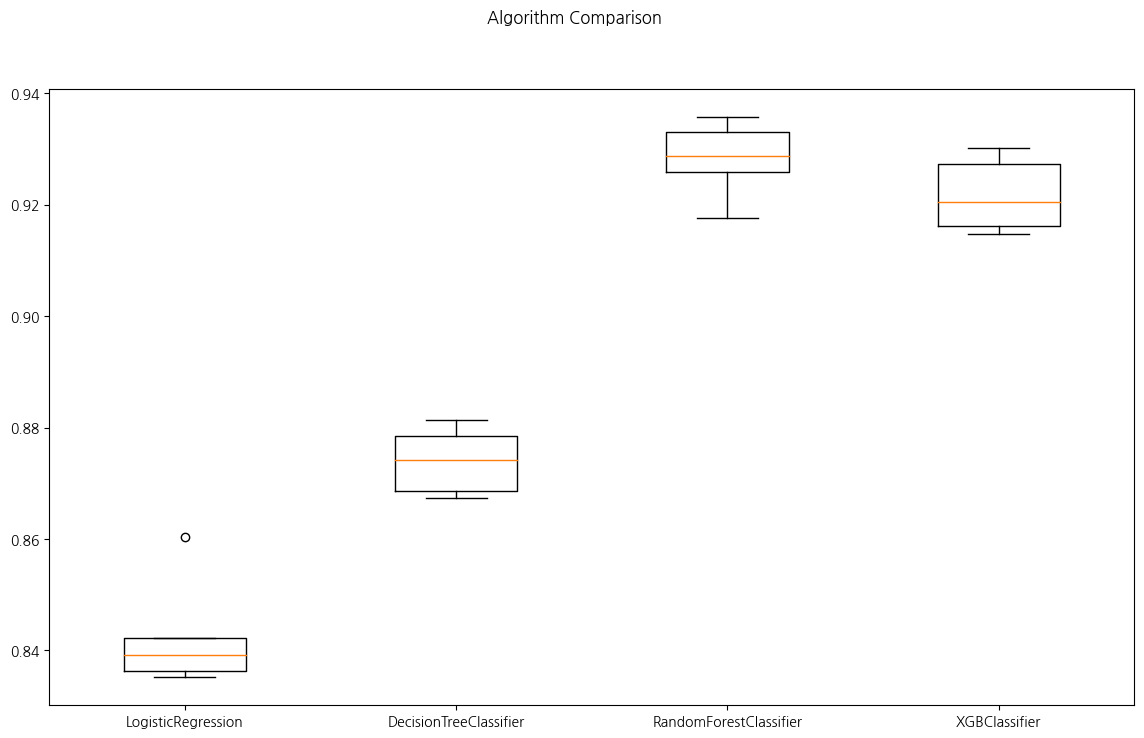

In [ ]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 테스트 데이터로 성능확인

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
tmp = []

for name, model in models:
    model.fit(X_train_over, y_train_over)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=names)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.801126,0.443182,0.906977,0.595420,0.843869
DecisionTreeClassifier,0.825516,0.471545,0.674419,0.555024,0.764502
RandomForestClassifier,0.909944,0.697917,0.779070,0.736264,0.857096
XGBClassifier,0.894934,0.647059,0.767442,0.702128,0.843452


DecisionTreeClassifier
RandomForestClassifier
XGBClassifier


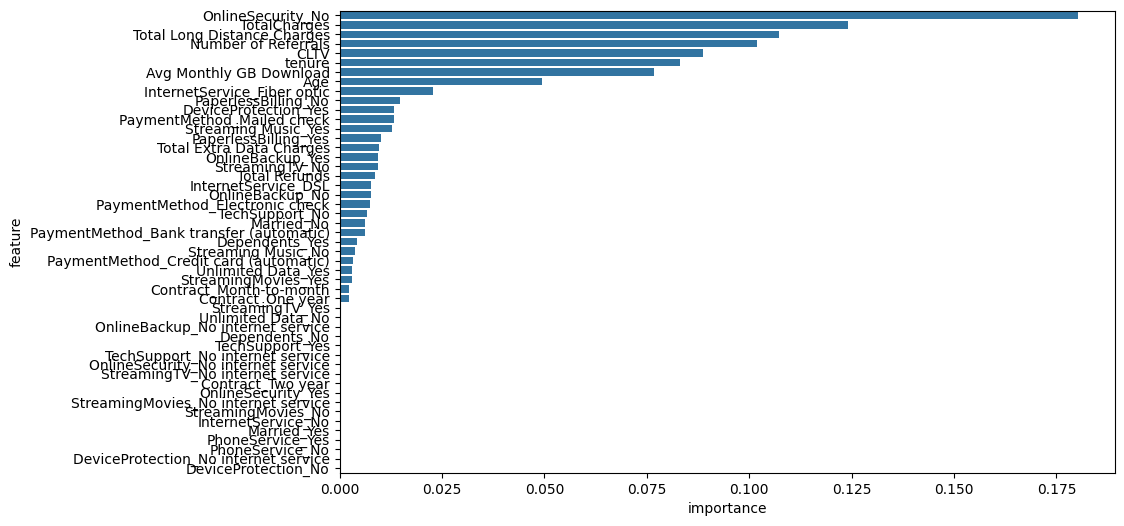

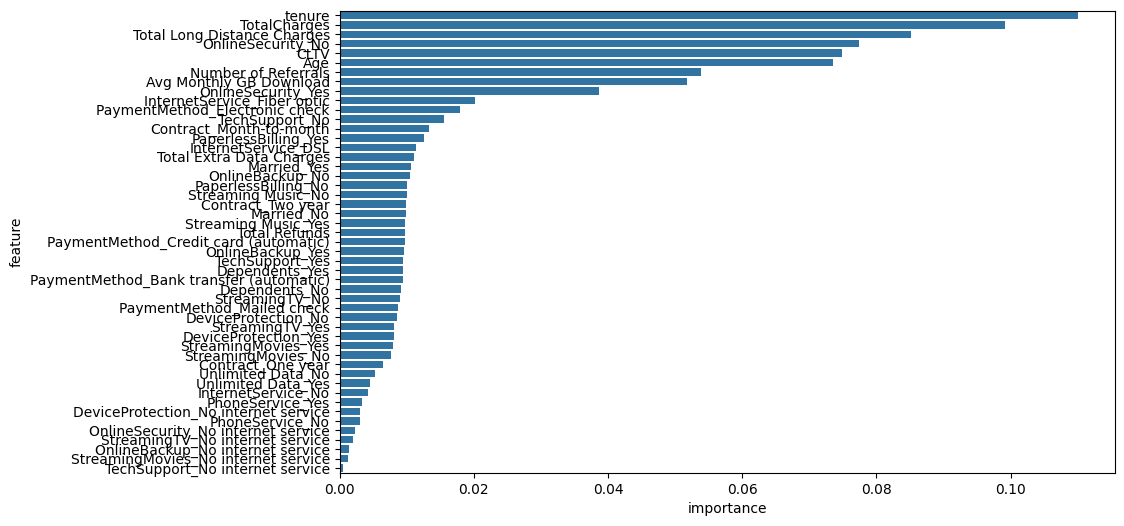

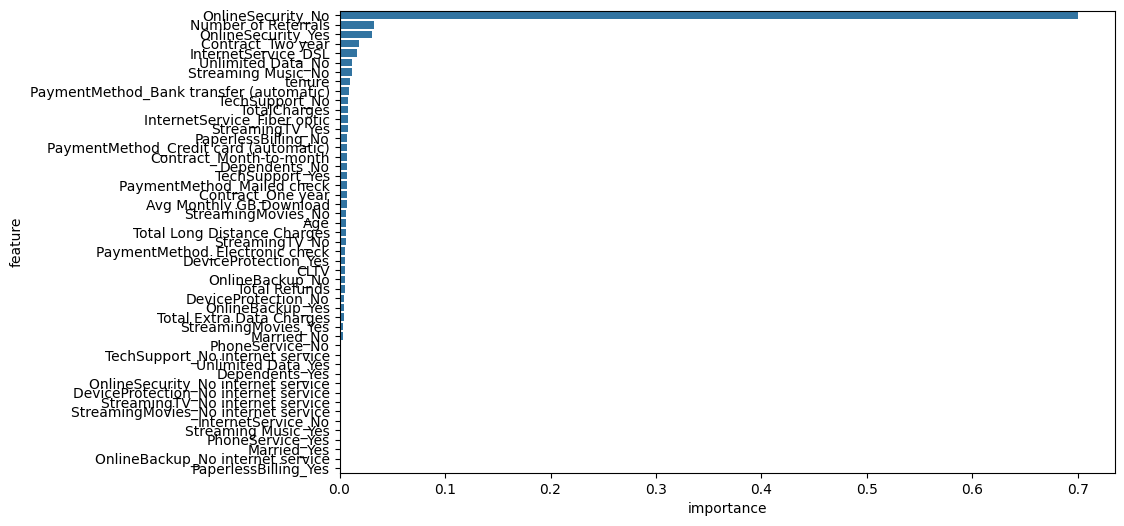

In [ ]:
for name, model in models:
    if name == 'LogisticRegression':
        continue
    model.fit(X_train, y_train)
    feature_importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': feature_importance
    }).sort_values(by='importance', ascending=False)

    print(name)
    # print(feature_importance_df)
    # print("-" * 30)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df)

- RandomForest의 Feature importance 상위컬럼
    - tenure
    - TotalCharges
    - OnlineSecurity_No
    - CLTV
    - Age

#### 틀린 데이터 확인
- RandomForest

In [ ]:
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
rf_clf.fit(X_train_over, y_train_over)
pred = rf_clf.predict(X_test)

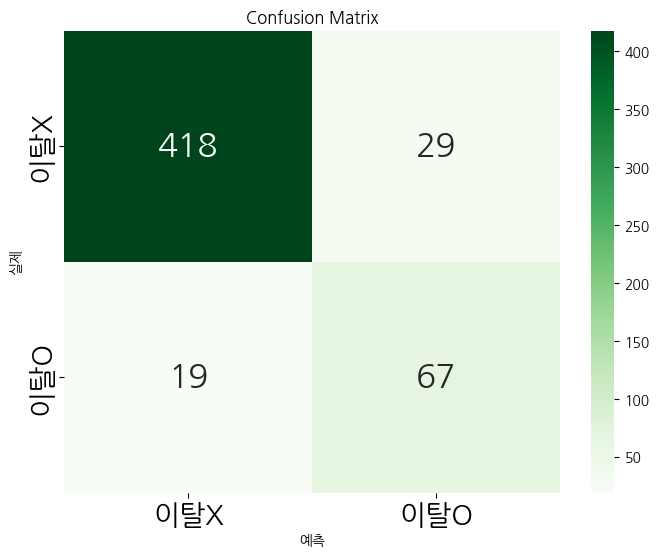

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['이탈X', '이탈O'], yticklabels=['이탈X', '이탈O'],
            annot_kws={"size": 24})
plt.xlabel('예측')
plt.ylabel('실제')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
acc = accuracy_score(y_test, pred)
pre = precision_score(y_test, pred)
re = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)

tmp = []
col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=['RandomForestClassifier'])

,accuracy,precision,recall,f1,roc_auc
RandomForestClassifier,0.909944,0.697917,0.77907,0.736264,0.857096


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred, target_names=['이탈 X', '이탈 O'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        이탈 X       0.96      0.94      0.95       447
        이탈 O       0.70      0.78      0.74        86

    accuracy                           0.91       533
   macro avg       0.83      0.86      0.84       533
weighted avg       0.91      0.91      0.91       533



In [ ]:
# 잘못 예측된 인덱스
misclassified_indices = np.where(pred != y_test)[0]

# 잘못 예측된 데이터
misclassified_data = X_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_labels = y_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_predictions = pred[misclassified_indices]

# 잘못 예측된 데이터프레임 생성
misclassified_df = pd.DataFrame({
    'Actual': misclassified_labels,
    'Predicted': misclassified_predictions,
}).reset_index(drop=True)

misclassified_df = pd.concat([misclassified_df, misclassified_data], axis=1)
print("Misclassified Data:")
misclassified_df.head()

Misclassified Data:


,Actual,Predicted,Age,Avg Monthly GB Download,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,Unlimited Data_No,Unlimited Data_Yes,tenure
0,0.0,1.0,-0.851852,1.347826,-0.328415,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,10.0,-0.397128,0.0,-0.463857,1.0,0.0,-0.687500
1,0.0,1.0,-0.555556,2.434783,0.736612,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,30.0,-0.290516,0.0,0.012586,1.0,0.0,-0.291667
2,0.0,1.0,-0.222222,-0.478261,0.313115,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.084983,0.0,0.154991,0.0,1.0,-0.229167
3,1.0,0.0,-0.222222,-0.565217,-0.407104,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,20.0,-0.338851,0.0,-0.384870,1.0,0.0,-0.625000
4,0.0,1.0,1.000000,-0.521739,-1.183060,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,-0.394804,0.0,-0.458510,0.0,1.0,-0.708333


In [ ]:
original_data = scaler.inverse_transform(misclassified_df[numeric_features])
misclassified_df[numeric_features] = original_data
misclassified_df.head()

,Actual,Predicted,Age,Avg Monthly GB Download,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,Unlimited Data_No,Unlimited Data_Yes,tenure
0,0.0,1.0,22.0,48.0,4033.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,10.0,0.00,0.0,49.70,1.0,0.0,2.0
1,0.0,1.0,30.0,73.0,5982.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,30.0,136.29,0.0,1862.90,1.0,0.0,21.0
2,0.0,1.0,39.0,6.0,5207.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,616.32,0.0,2404.85,0.0,1.0,24.0
3,1.0,0.0,39.0,4.0,3889.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,20.0,74.50,0.0,350.30,1.0,0.0,5.0
4,0.0,1.0,72.0,5.0,2469.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,2.97,0.0,70.05,0.0,1.0,1.0


- RandomForest의 Feature importance 상위컬럼
    - tenure
    - TotalCharges
    - OnlineSecurity_No
    - CLTV
    - Age

In [ ]:
misclassified_df['tenure'].value_counts().sort_index()

tenure
1.0     11
2.0      8
3.0      2
4.0      1
5.0      2
8.0      1
9.0      1
10.0     1
12.0     1
13.0     1
15.0     1
19.0     1
21.0     1
23.0     1
24.0     1
25.0     1
28.0     1
32.0     1
33.0     1
35.0     1
44.0     1
53.0     1
56.0     2
65.0     1
66.0     1
68.0     1
71.0     1
72.0     1
Name: count, dtype: int64

In [ ]:
misclassified_df['TotalCharges'].value_counts().sort_index()

TotalCharges
19.75      2
20.35      1
20.40      1
25.40      1
25.70      1
36.55      1
45.40      1
49.70      1
59.75      1
70.05      1
70.60      1
75.10      1
77.50      1
80.95      1
90.10      1
95.05      1
105.60     1
120.25     1
144.80     1
145.00     1
154.30     1
186.05     1
350.30     1
398.55     1
651.50     1
692.10     1
834.10     1
893.00     1
989.45     1
1327.15    1
1505.45    1
1862.90    1
1875.55    1
2341.55    1
2404.85    1
2416.55    1
2958.95    1
3046.05    1
3124.50    1
3217.65    1
5016.25    1
5265.10    1
5914.40    1
6792.45    1
7299.65    1
7459.05    1
7723.70    1
Name: count, dtype: int64

In [ ]:
misclassified_df['OnlineSecurity_No'].value_counts().sort_index()

OnlineSecurity_No
0.0    11
1.0    37
Name: count, dtype: int64

In [ ]:
misclassified_df['CLTV'].value_counts().sort_index()

CLTV
2053.0    1
2245.0    1
2247.0    1
2469.0    1
2635.0    1
2966.0    1
3280.0    1
3530.0    1
3663.0    1
3666.0    1
3889.0    1
4033.0    1
4072.0    2
4120.0    1
4142.0    1
4400.0    1
4521.0    1
4545.0    1
4556.0    1
4800.0    1
4848.0    1
4851.0    1
4861.0    1
4916.0    1
4917.0    1
4931.0    1
4964.0    1
5000.0    1
5003.0    1
5039.0    1
5080.0    1
5098.0    1
5121.0    1
5122.0    1
5207.0    1
5225.0    1
5249.0    1
5325.0    1
5413.0    1
5774.0    1
5781.0    1
5982.0    1
5984.0    1
6161.0    1
6284.0    1
6441.0    1
6484.0    1
Name: count, dtype: int64

In [ ]:
misclassified_df['Age'].value_counts().sort_index()

Age
19.0    2
20.0    2
21.0    2
22.0    1
23.0    1
29.0    1
30.0    2
31.0    3
33.0    1
35.0    1
38.0    2
39.0    2
41.0    1
43.0    3
44.0    1
45.0    1
46.0    1
47.0    1
48.0    1
49.0    1
52.0    1
53.0    1
54.0    1
56.0    1
57.0    1
60.0    1
61.0    3
63.0    1
65.0    1
69.0    1
70.0    2
72.0    1
73.0    1
74.0    1
77.0    1
Name: count, dtype: int64

- 골고루 분포되어 있음

# 딥러닝 모델로 예측

## scale, oversampling 적용없이

In [ ]:
X = df[df.columns.difference(['churn_rate'])]
y = df['churn_rate']

In [ ]:
X.shape, y.shape

((2665, 49), (2665,))

#### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
												  test_size=0.2,
                                                  stratify=y,
												  random_state=13)

In [ ]:
X_train.shape, X_test.shape

((2132, 49), (533, 49))

#### 모델구조

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()
model.add(layers.Dense(64,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       input_shape=(X_train.shape[1],),
                       activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

#### 모델 시각화

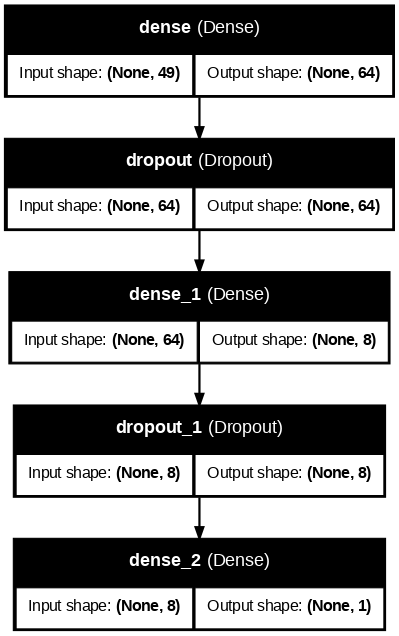

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=80)

#### 학습률 조정

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=(X_train.shape[0]/32)*50,
    decay_rate=1,
    staircase=False)
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=70,
                                            restore_best_weights=True)]
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,729 (14.57 KB)

 Trainable params: 3,729 (14.57 KB)

 Non-trainable params: 0 (0.00 B)

#### 학습

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=150,
                    callbacks=callback,
                    verbose=0)

#### 학습결과

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

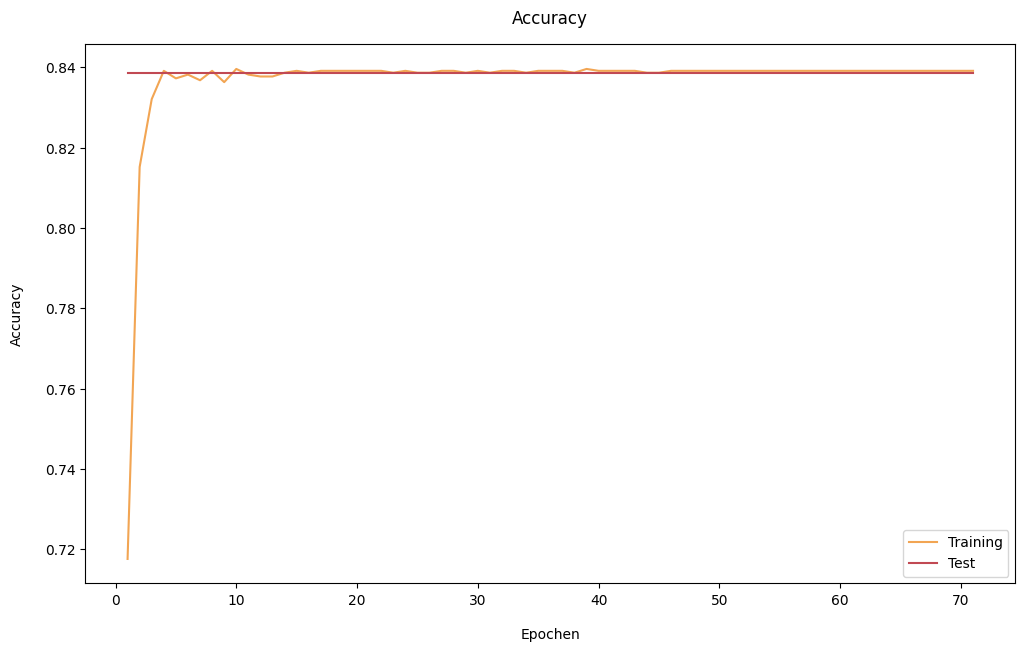

<Figure size 640x480 with 0 Axes>

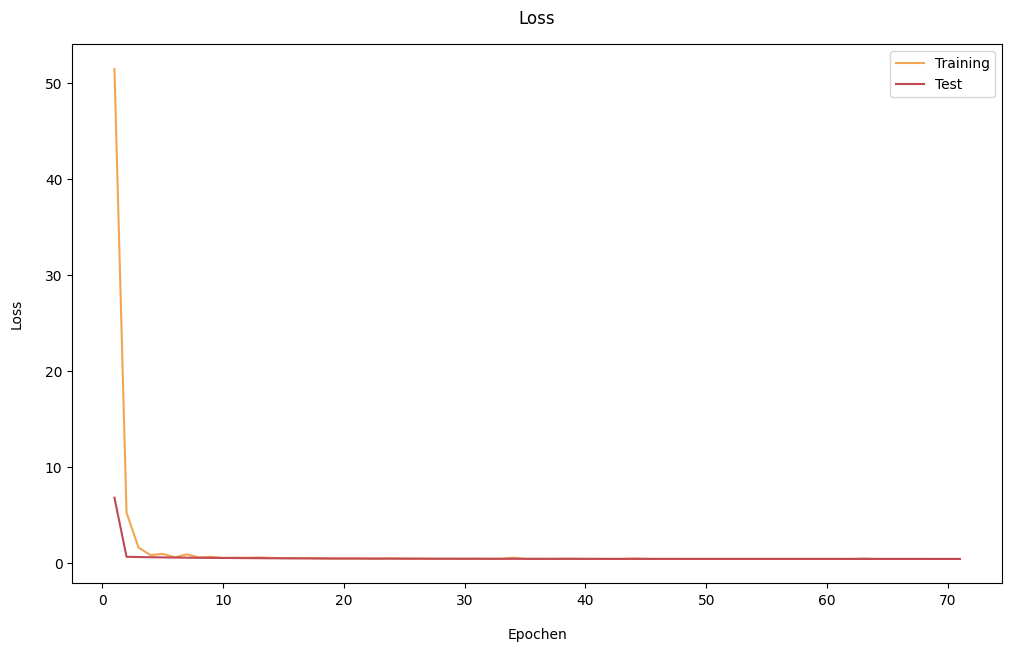

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,7))
plt.plot(epochs, acc, color='#f2a553', label='Training')
plt.plot(epochs, val_acc, 'b', color='#c14953', label='Test')
plt.title('Accuracy', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Accuracy', labelpad = 15)
plt.legend()
plt.figure()

plt.figure(figsize=(12,7))
plt.plot(epochs, loss, color='#f2a553', label='Training')
plt.plot(epochs, val_loss, 'b', color='#c14953', label='Test')
plt.title('Loss', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Loss', labelpad = 15)
plt.legend()
plt.figure

#### 모델평가

In [ ]:
accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 7.1080
Training Accuracy: 0.8391
Testing Score: 6.8184
Testing Accuracy: 0.8386


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


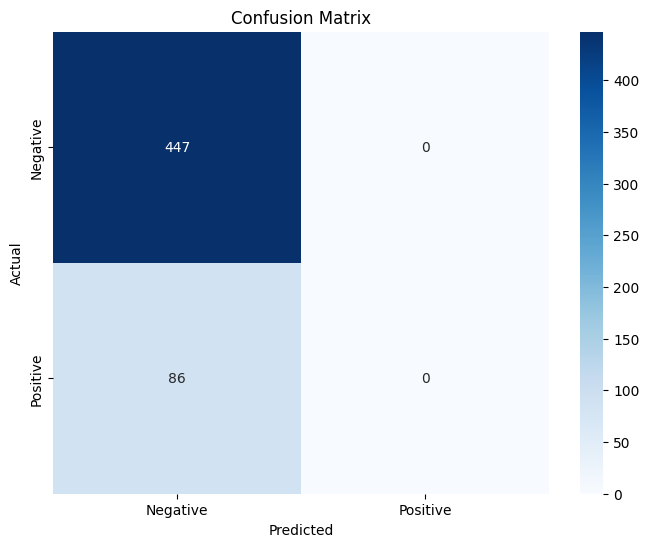

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

tmp = []
col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=['DL Model'])

,accuracy,precision,recall,f1,roc_auc
DL Model,0.838649,0.0,0.0,0.0,0.690547


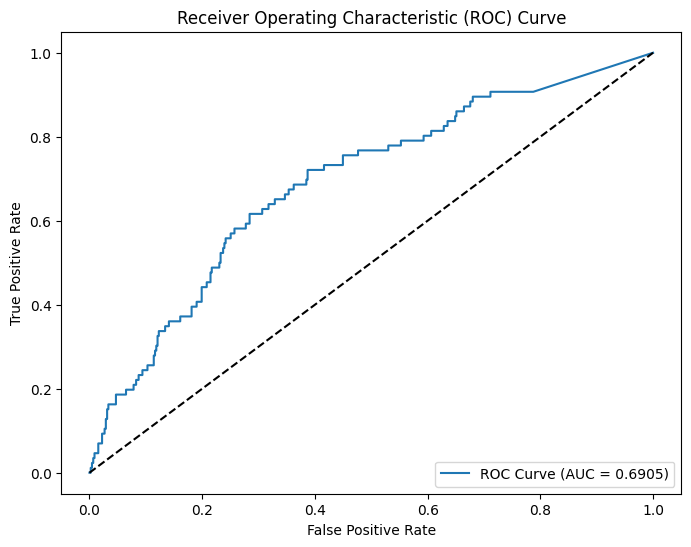

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Robust Scale + Oversampling 적용

In [ ]:
numeric_features = ['tenure', 'TotalCharges', 'CLTV', 'Age', 'Number of Referrals', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']

In [ ]:
from sklearn.preprocessing import RobustScaler

df_scale = df.copy()

scaler = RobustScaler()
df_scale[numeric_features] = scaler.fit_transform(df_scale[numeric_features])

df_scale.head()

,Age,Avg Monthly GB Download,CLTV,Number of Referrals,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,churn_rate,tenure,...,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Unlimited Data_No,Unlimited Data_Yes
2,-0.518519,0.391304,0.403279,0.00,0.0,-0.321094,0.0,-0.261319,1.0,-0.562500,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.814815,1.304348,0.201639,0.00,0.0,-0.290023,0.0,0.323475,1.0,-0.145833,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,1.222222,-0.391304,0.436612,0.00,20.0,-0.397128,0.0,-0.466498,1.0,-0.708333,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,0.111111,0.043478,0.568306,0.00,0.0,-0.159898,0.0,-0.186457,1.0,-0.500000,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
16,1.074074,0.000000,0.365027,0.25,0.0,-0.091428,0.0,-0.310508,1.0,-0.562500,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X = df_scale[df_scale.columns.difference(['churn_rate'])]
y = df_scale['churn_rate']

In [ ]:
X.shape, y.shape

((2665, 49), (2665,))

#### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
												  test_size=0.2,
                                                  stratify=y,
												  random_state=13)

In [ ]:
X_train.shape, X_test.shape

((2132, 49), (533, 49))

#### SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((2132, 49), (2132,))

In [ ]:
X_train_over.shape, y_train_over.shape

((3578, 49), (3578,))

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0., 1.]), array([1789,  343]))
(array([0., 1.]), array([1789, 1789]))


#### 모델구조

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()
model.add(layers.Dense(64,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       input_shape=(X_train_over.shape[1],),
                       activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

#### 모델 시각화

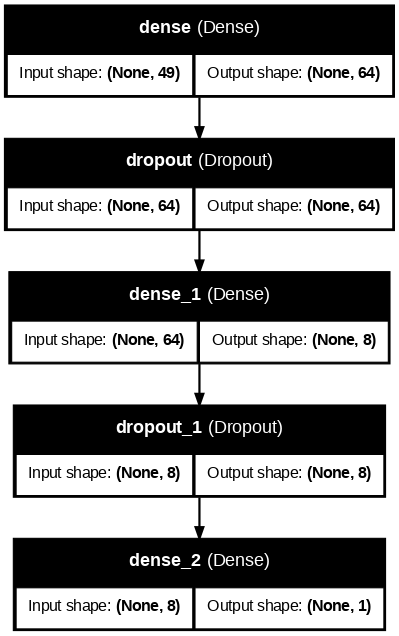

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=80)

#### 학습률 조정

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=(X_train_over.shape[0]/32)*50,
    decay_rate=1,
    staircase=False)
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
                                            restore_best_weights=True)]
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,729 (14.57 KB)

 Trainable params: 3,729 (14.57 KB)

 Non-trainable params: 0 (0.00 B)

#### 학습

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
history = model.fit(X_train_over, y_train_over,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=150,
                    callbacks=[callback, checkpoint],
                    verbose=1)

Epoch 1/150
 90/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - loss: 0.7468
Epoch 1: val_loss improved from inf to 0.50495, saving model to best_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6596 - loss: 0.7313 - val_accuracy: 0.8068 - val_loss: 0.5050
Epoch 2/150
111/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7659 - loss: 0.5293
Epoch 2: val_loss improved from 0.50495 to 0.44936, saving model to best_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7660 - loss: 0.5292 - val_accuracy: 0.8049 - val_loss: 0.4494
Epoch 3/150
110/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7862 - loss: 0.4752
Epoch 3: val_loss improved from 0.44936 to 0.41585, saving model to best_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7862 - loss: 0.4751 - val_accuracy: 0.8049 - val_loss: 0.4158
Epoch 4/150
102/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.4464
Epoch 4: val_loss did not improve from 0.41585
112

#### 학습결과

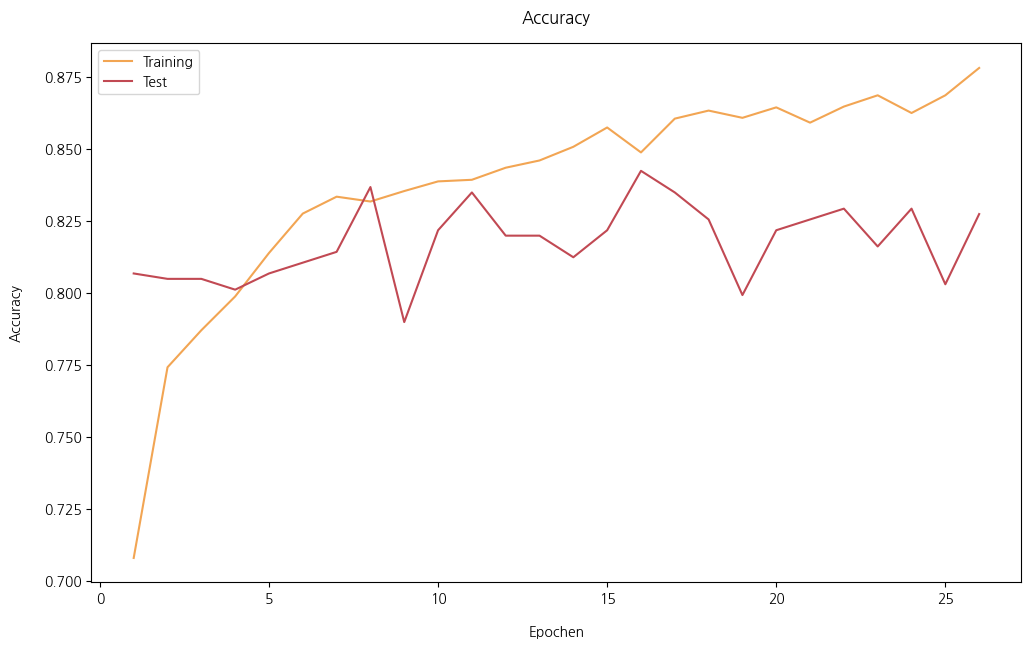

<Figure size 640x480 with 0 Axes>

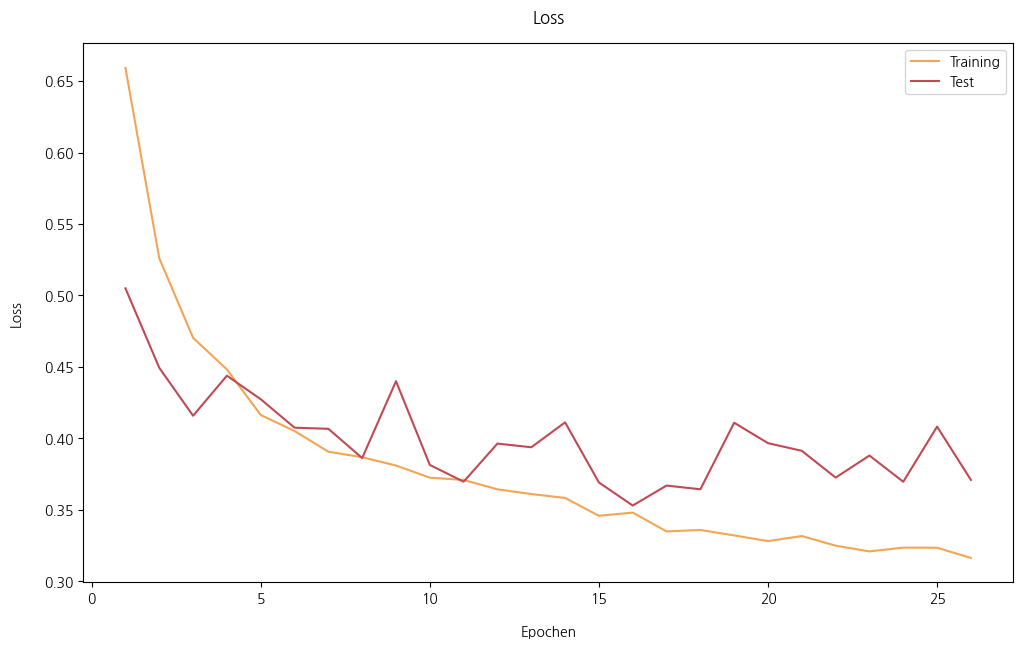

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,7))
plt.plot(epochs, acc, color='#f2a553', label='Training')
plt.plot(epochs, val_acc, 'b', color='#c14953', label='Test')
plt.title('Accuracy', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Accuracy', labelpad = 15)
plt.legend()
plt.figure()

plt.figure(figsize=(12,7))
plt.plot(epochs, loss, color='#f2a553', label='Training')
plt.plot(epochs, val_loss, 'b', color='#c14953', label='Test')
plt.title('Loss', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Loss', labelpad = 15)
plt.legend()
plt.figure

plt.show();

#### 모델평가

In [ ]:
accuracy = model.evaluate(X_train_over, y_train_over, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.2995
Training Accuracy: 0.8779
Testing Score: 0.3530
Testing Accuracy: 0.8424


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


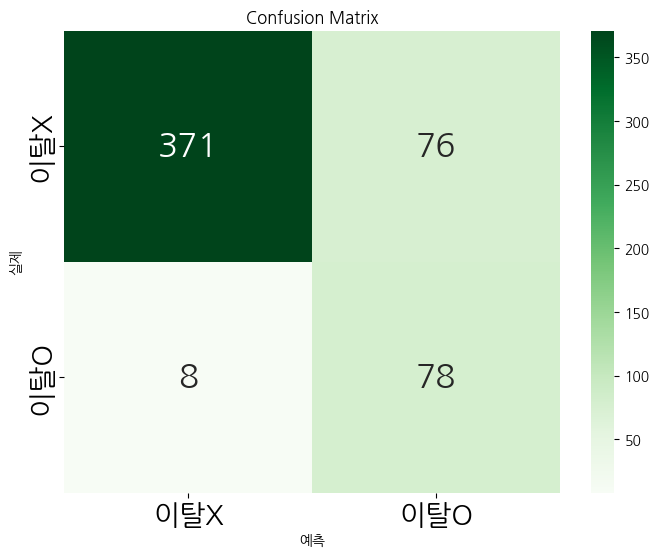

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['이탈X', '이탈O'], yticklabels=['이탈X', '이탈O'],
            annot_kws={"size": 24})
plt.xlabel('예측')
plt.ylabel('실제')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

tmp = []
col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=['DL Model'])

,accuracy,precision,recall,f1,roc_auc
DL Model,0.842402,0.506579,0.895349,0.647059,0.921934


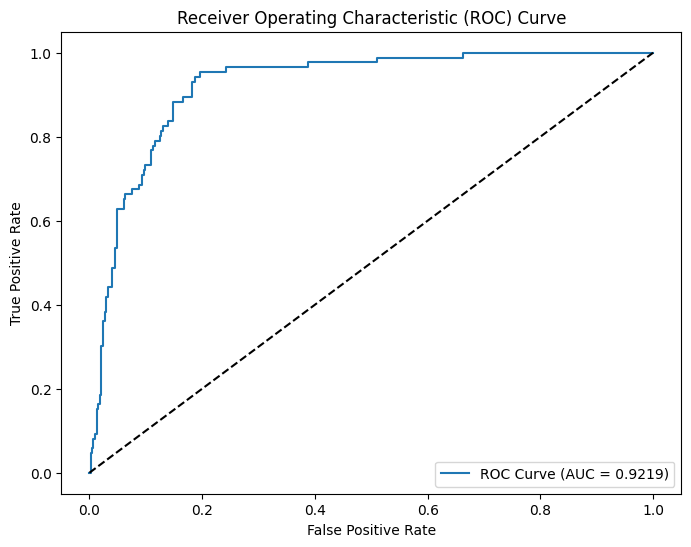

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

- 과적합 현상 해결해야함

## 과적합 현상 해결시도
- 드롭아웃 비율 증가 + 학습률 감소 + 뉴런 수 증가

In [ ]:
numeric_features = ['tenure', 'TotalCharges', 'CLTV', 'Age', 'Number of Referrals', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']

In [ ]:
from sklearn.preprocessing import RobustScaler

df_scale = df.copy()

scaler = RobustScaler()
df_scale[numeric_features] = scaler.fit_transform(df_scale[numeric_features])

df_scale.head()

,Age,Avg Monthly GB Download,CLTV,Number of Referrals,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,churn_rate,tenure,...,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Unlimited Data_No,Unlimited Data_Yes
2,-0.518519,0.391304,0.403279,0.00,0.0,-0.321094,0.0,-0.261319,1.0,-0.562500,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.814815,1.304348,0.201639,0.00,0.0,-0.290023,0.0,0.323475,1.0,-0.145833,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,1.222222,-0.391304,0.436612,0.00,20.0,-0.397128,0.0,-0.466498,1.0,-0.708333,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,0.111111,0.043478,0.568306,0.00,0.0,-0.159898,0.0,-0.186457,1.0,-0.500000,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
16,1.074074,0.000000,0.365027,0.25,0.0,-0.091428,0.0,-0.310508,1.0,-0.562500,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X = df_scale[df_scale.columns.difference(['churn_rate'])]
y = df_scale['churn_rate']

In [ ]:
X.shape, y.shape

((2665, 49), (2665,))

#### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
												  test_size=0.2,
                                                  stratify=y,
												  random_state=13)

In [ ]:
X_train.shape, X_test.shape

((2132, 49), (533, 49))

#### SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((2132, 49), (2132,))

In [ ]:
X_train_over.shape, y_train_over.shape

((3578, 49), (3578,))

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0., 1.]), array([1789,  343]))
(array([0., 1.]), array([1789, 1789]))


#### 모델구조

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization


In [ ]:
model = Sequential()
model.add(layers.Dense(64,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       input_shape=(X_train_over.shape[1],),
                       activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

#### 모델 시각화

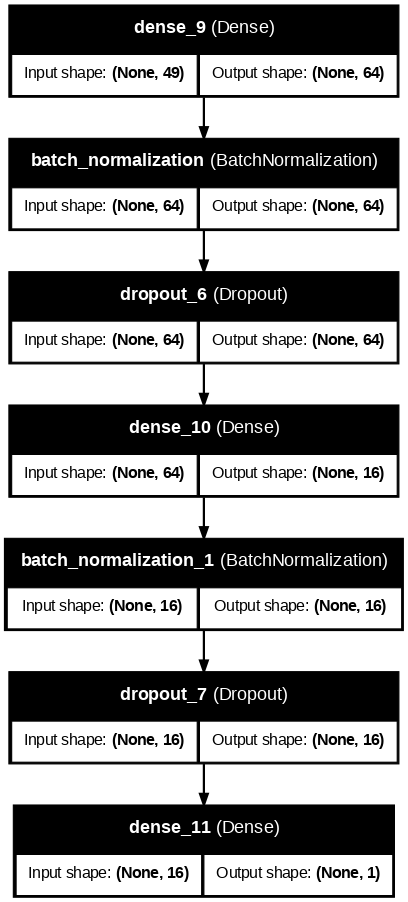

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=80)

#### 학습률 조정

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=(X_train_over.shape[0]/32)*50,
    decay_rate=0.5,
    staircase=True)
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,
                                            restore_best_weights=True)]
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,577 (17.88 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 160 (640.00 B)

#### 학습

In [ ]:
history = model.fit(X_train_over, y_train_over,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=150,
                    callbacks=callback,
                    verbose=1)

Epoch 1/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7062 - loss: 0.6019 - val_accuracy: 0.8180 - val_loss: 0.4680
Epoch 2/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7761 - loss: 0.4774 - val_accuracy: 0.8274 - val_loss: 0.4036
Epoch 3/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7985 - loss: 0.4383 - val_accuracy: 0.7936 - val_loss: 0.4316
Epoch 4/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8181 - loss: 0.4001 - val_accuracy: 0.8086 - val_loss: 0.3951
Epoch 5/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8275 - loss: 0.3977 - val_accuracy: 0.8143 - val_loss: 0.3838
Epoch 6/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8384 - loss: 0.3714 - val_accuracy: 0.8161 - val_loss: 0.3763
Epoch 7/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8349 - loss: 0.3639 - val_accuracy: 0.8068 - val_loss: 0.3846
Epoch 8/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.3557 - val_acc

#### 학습결과

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

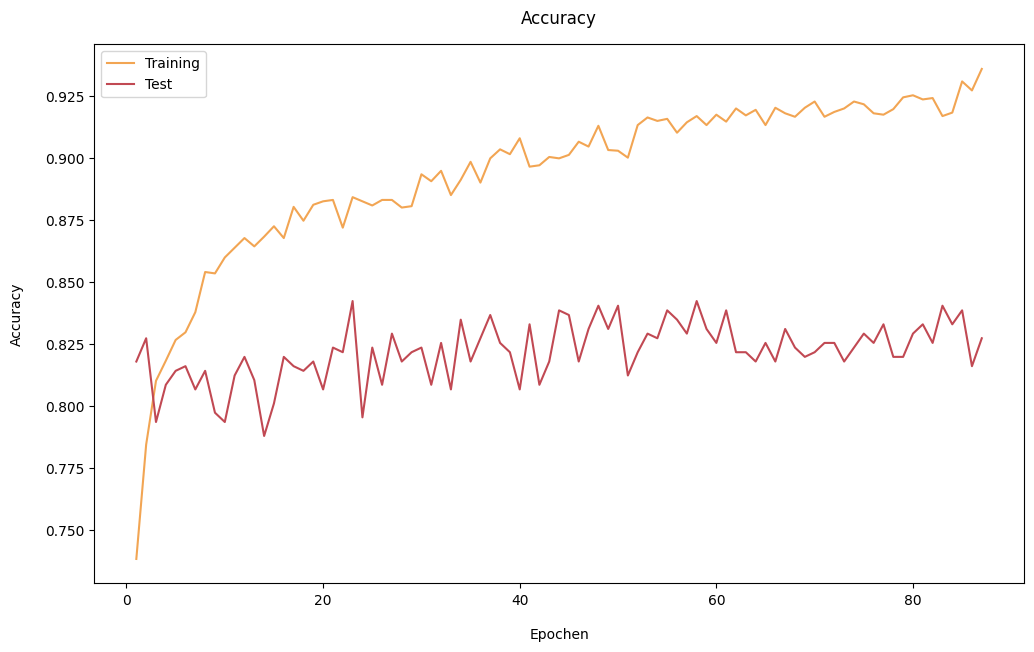

<Figure size 640x480 with 0 Axes>

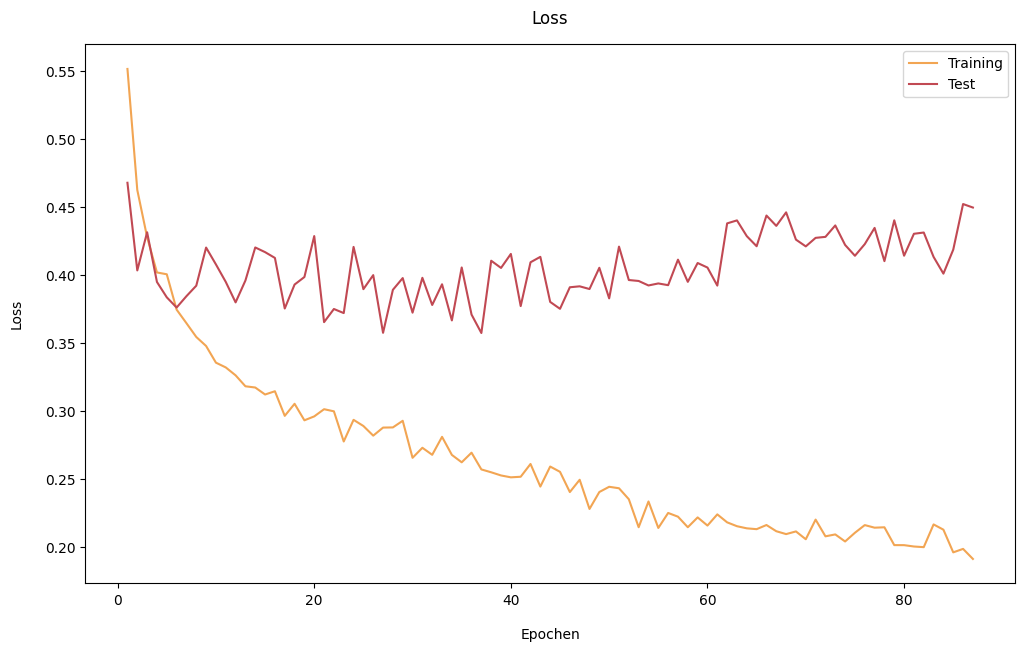

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,7))
plt.plot(epochs, acc, color='#f2a553', label='Training')
plt.plot(epochs, val_acc, 'b', color='#c14953', label='Test')
plt.title('Accuracy', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Accuracy', labelpad = 15)
plt.legend()
plt.figure()

plt.figure(figsize=(12,7))
plt.plot(epochs, loss, color='#f2a553', label='Training')
plt.plot(epochs, val_loss, 'b', color='#c14953', label='Test')
plt.title('Loss', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Loss', labelpad = 15)
plt.legend()
plt.figure

#### 모델평가

In [ ]:
accuracy = model.evaluate(X_train_over, y_train_over, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.1902
Training Accuracy: 0.9335
Testing Score: 0.3576
Testing Accuracy: 0.8368


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


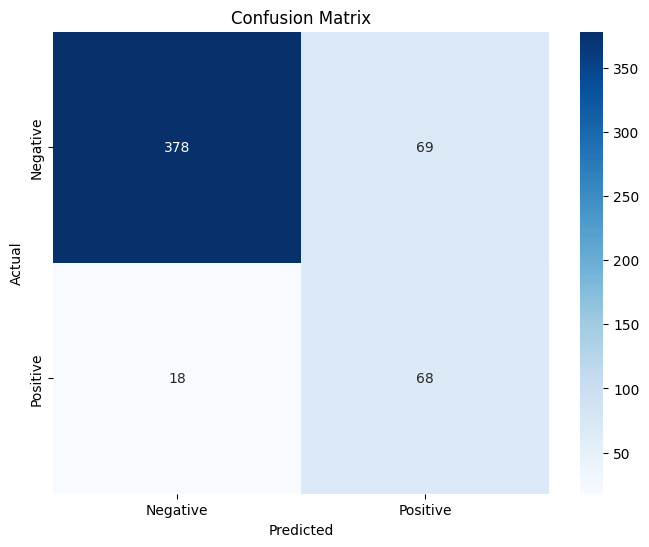

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

tmp = []
col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=['DL Model'])

,accuracy,precision,recall,f1,roc_auc
DL Model,0.836773,0.49635,0.790698,0.609865,0.907575


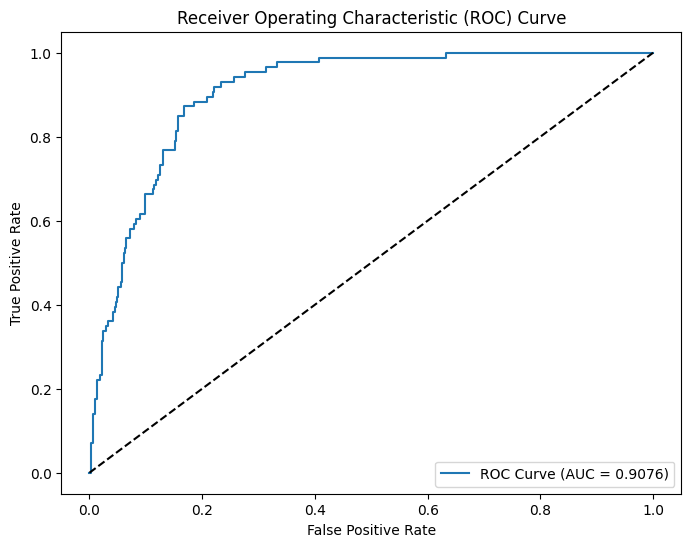

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

- 실패

## Standard Scale + Oversampling 적용

In [ ]:
numeric_features = ['tenure', 'TotalCharges', 'CLTV', 'Age', 'Number of Referrals', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']

In [ ]:
from sklearn.preprocessing import StandardScaler

df_scale = df.copy()

scaler = StandardScaler()
df_scale[numeric_features] = scaler.fit_transform(df_scale[numeric_features])

df_scale.head()

,Age,Avg Monthly GB Download,CLTV,Number of Referrals,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,churn_rate,tenure,...,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Unlimited Data_No,Unlimited Data_Yes
2,-0.906882,0.217435,0.766041,-0.711626,-0.272789,-0.829743,-0.25095,-0.756483,1.0,-1.132323,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-1.392179,1.233190,0.451474,-0.711626,-0.272789,-0.784694,-0.25095,0.189957,1.0,-0.323759,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,1.944239,-0.653212,0.818042,-0.711626,0.503901,-0.939984,-0.25095,-1.088549,1.0,-1.415320,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,0.124374,-0.169519,1.023491,-0.711626,-0.272789,-0.596025,-0.25095,-0.635326,1.0,-1.011038,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
16,1.701590,-0.217889,0.706367,-0.394806,-0.272789,-0.496751,-0.25095,-0.836092,1.0,-1.132323,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X = df_scale[df_scale.columns.difference(['churn_rate'])]
y = df_scale['churn_rate']

In [ ]:
X.shape, y.shape

((2665, 49), (2665,))

#### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
												  test_size=0.2,
                                                  stratify=y,
												  random_state=13)

In [ ]:
X_train.shape, X_test.shape

((2132, 49), (533, 49))

#### SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((2132, 49), (2132,))

In [ ]:
X_train_over.shape, y_train_over.shape

((3578, 49), (3578,))

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0., 1.]), array([1789,  343]))
(array([0., 1.]), array([1789, 1789]))


#### 모델구조

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()
model.add(layers.Dense(64,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       input_shape=(X_train_over.shape[1],),
                       activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

#### 모델 시각화

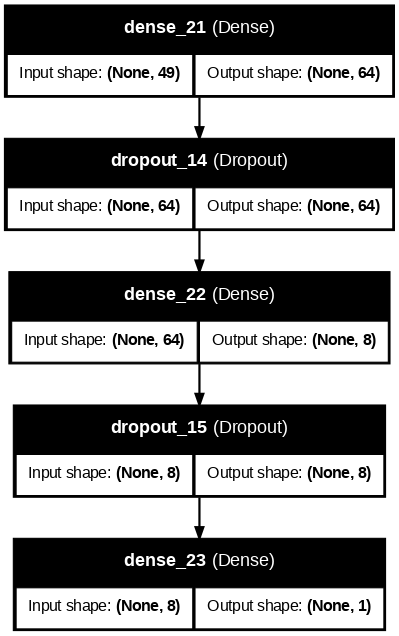

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=80)

#### 학습률 조정

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=(X_train_over.shape[0]/32)*50,
    decay_rate=1,
    staircase=False)
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,
                                            restore_best_weights=True)]
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,729 (14.57 KB)

 Trainable params: 3,729 (14.57 KB)

 Non-trainable params: 0 (0.00 B)

#### 학습

In [ ]:
history = model.fit(X_train_over, y_train_over,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=150,
                    callbacks=callback,
                    verbose=1)

Epoch 1/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6649 - loss: 0.6197 - val_accuracy: 0.7730 - val_loss: 0.4354
Epoch 2/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7990 - loss: 0.4366 - val_accuracy: 0.7917 - val_loss: 0.3950
Epoch 3/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8239 - loss: 0.3951 - val_accuracy: 0.7824 - val_loss: 0.4094
Epoch 4/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8410 - loss: 0.3709 - val_accuracy: 0.8236 - val_loss: 0.3677
Epoch 5/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8515 - loss: 0.3528 - val_accuracy: 0.8105 - val_loss: 0.3559
Epoch 6/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.3509 - val_accuracy: 0.8086 - val_loss: 0.3671
Epoch 7/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8663 - loss: 0.3445 - val_accuracy: 0.8049 - val_loss: 0.3638
Epoch 8/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.3231 - val_accu

#### 학습결과

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

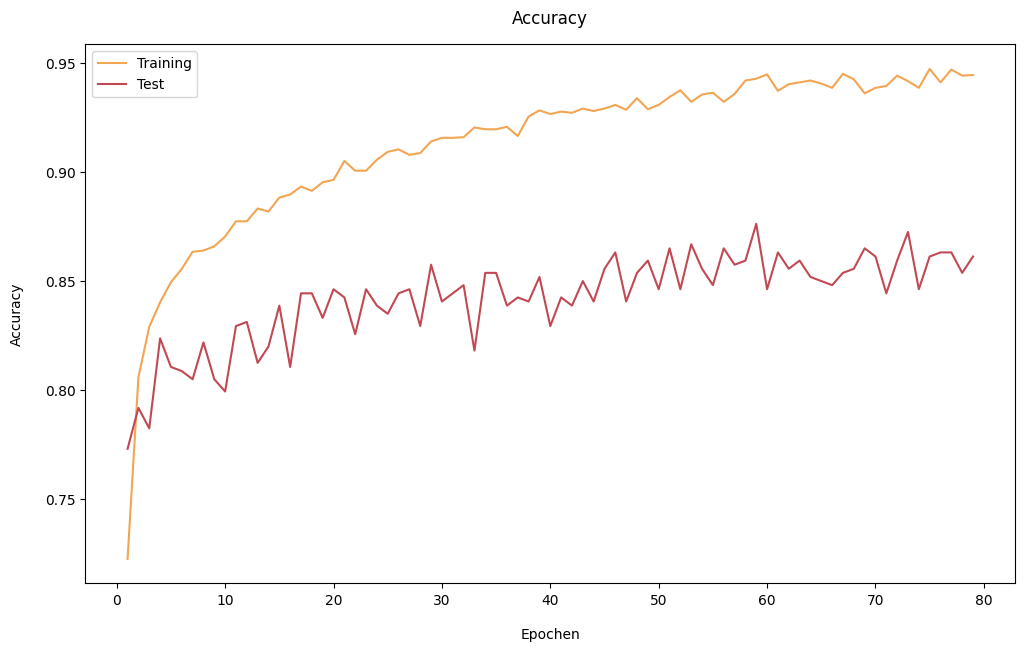

<Figure size 640x480 with 0 Axes>

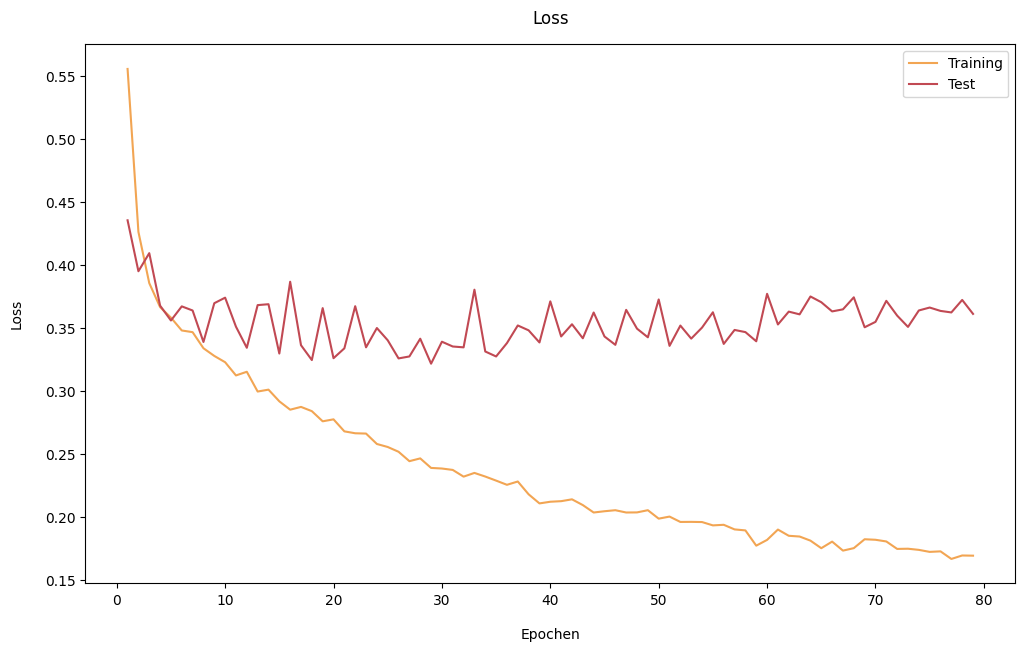

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,7))
plt.plot(epochs, acc, color='#f2a553', label='Training')
plt.plot(epochs, val_acc, 'b', color='#c14953', label='Test')
plt.title('Accuracy', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Accuracy', labelpad = 15)
plt.legend()
plt.figure()

plt.figure(figsize=(12,7))
plt.plot(epochs, loss, color='#f2a553', label='Training')
plt.plot(epochs, val_loss, 'b', color='#c14953', label='Test')
plt.title('Loss', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Loss', labelpad = 15)
plt.legend()
plt.figure

#### 모델평가

In [ ]:
accuracy = model.evaluate(X_train_over, y_train_over, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.2093
Training Accuracy: 0.9223
Testing Score: 0.3216
Testing Accuracy: 0.8574


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


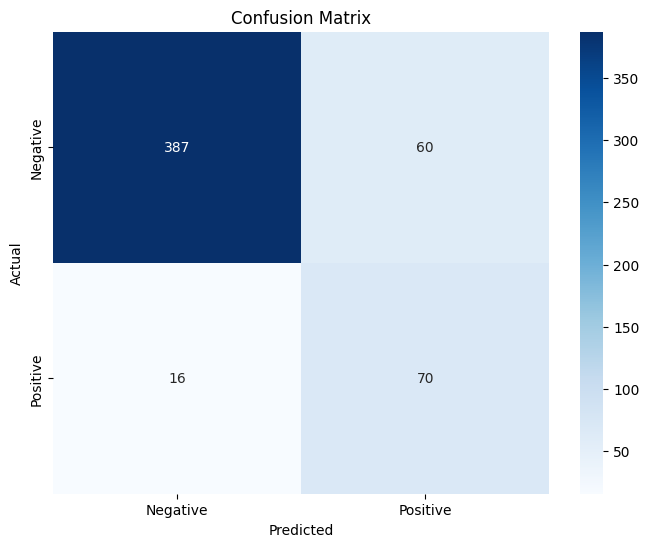

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

tmp = []
col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=['DL Model'])

,accuracy,precision,recall,f1,roc_auc
DL Model,0.857411,0.538462,0.813953,0.648148,0.925888


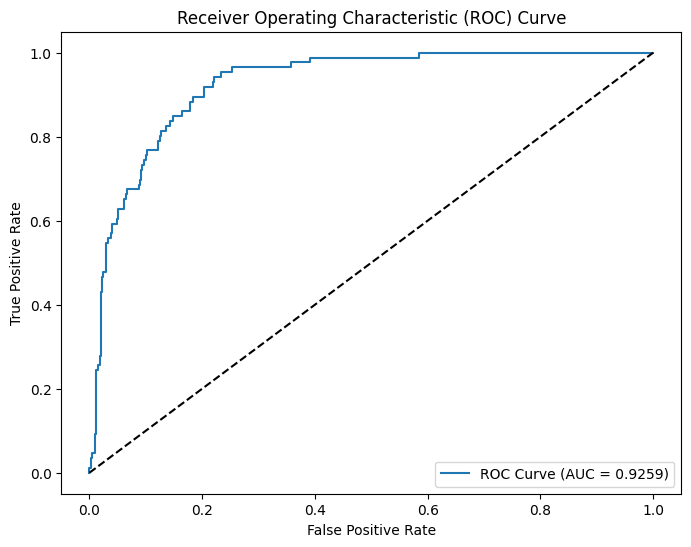

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MinMaxScaler + Oversampling

In [ ]:
numeric_features = ['tenure', 'TotalCharges', 'CLTV', 'Age', 'Number of Referrals', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_scale = df.copy()

scaler = MinMaxScaler()
df_scale[numeric_features] = scaler.fit_transform(df_scale[numeric_features])

df_scale.head()

,Age,Avg Monthly GB Download,CLTV,Number of Referrals,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,churn_rate,tenure,...,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Unlimited Data_No,Unlimited Data_Yes
2,0.196721,0.305882,0.748943,0.000000,0.000000,0.027267,0.0,0.095469,1.0,0.111111,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.065574,0.552941,0.666815,0.000000,0.000000,0.038410,0.0,0.354423,1.0,0.388889,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,0.967213,0.094118,0.762519,0.000000,0.133333,0.000000,0.0,0.004613,1.0,0.013889,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,0.475410,0.211765,0.816158,0.000000,0.000000,0.085075,0.0,0.128619,1.0,0.152778,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
16,0.901639,0.200000,0.733363,0.090909,0.000000,0.109630,0.0,0.073688,1.0,0.111111,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X = df_scale[df_scale.columns.difference(['churn_rate'])]
y = df_scale['churn_rate']

In [ ]:
X.shape, y.shape

((2665, 49), (2665,))

#### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
												  test_size=0.2,
                                                  stratify=y,
												  random_state=13)

In [ ]:
X_train.shape, X_test.shape

((2132, 49), (533, 49))

#### SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((2132, 49), (2132,))

In [ ]:
X_train_over.shape, y_train_over.shape

((3578, 49), (3578,))

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0., 1.]), array([1789,  343]))
(array([0., 1.]), array([1789, 1789]))


#### 모델구조

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()
model.add(layers.Dense(64,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       input_shape=(X_train_over.shape[1],),
                       activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

#### 모델 시각화

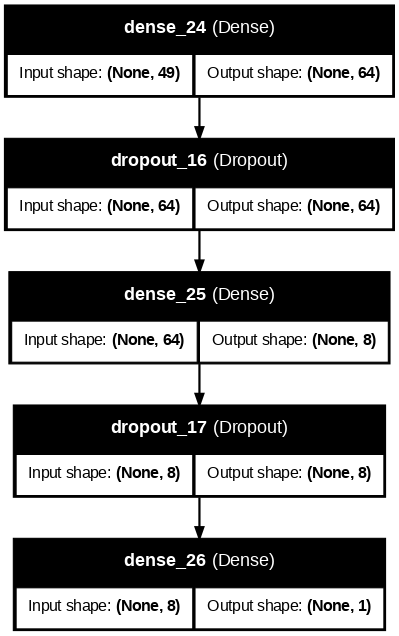

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=80)

#### 학습률 조정

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=(X_train_over.shape[0]/32)*50,
    decay_rate=1,
    staircase=False)
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,
                                            restore_best_weights=True)]
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,729 (14.57 KB)

 Trainable params: 3,729 (14.57 KB)

 Non-trainable params: 0 (0.00 B)

#### 학습

In [ ]:
history = model.fit(X_train_over, y_train_over,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=150,
                    callbacks=callback,
                    verbose=1)

Epoch 1/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6486 - loss: 0.6092 - val_accuracy: 0.7899 - val_loss: 0.4131
Epoch 2/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8049 - loss: 0.4200 - val_accuracy: 0.7936 - val_loss: 0.3939
Epoch 3/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8123 - loss: 0.4092 - val_accuracy: 0.7955 - val_loss: 0.3774
Epoch 4/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8306 - loss: 0.3828 - val_accuracy: 0.7974 - val_loss: 0.3780
Epoch 5/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.3798 - val_accuracy: 0.8011 - val_loss: 0.3708
Epoch 6/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8538 - loss: 0.3585 - val_accuracy: 0.7899 - val_loss: 0.3836
Epoch 7/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8613 - loss: 0.3418 - val_accuracy: 0.8030 - val_loss: 0.3695
Epoch 8/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8427 - loss: 0.3701 - val_accu

#### 학습결과

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

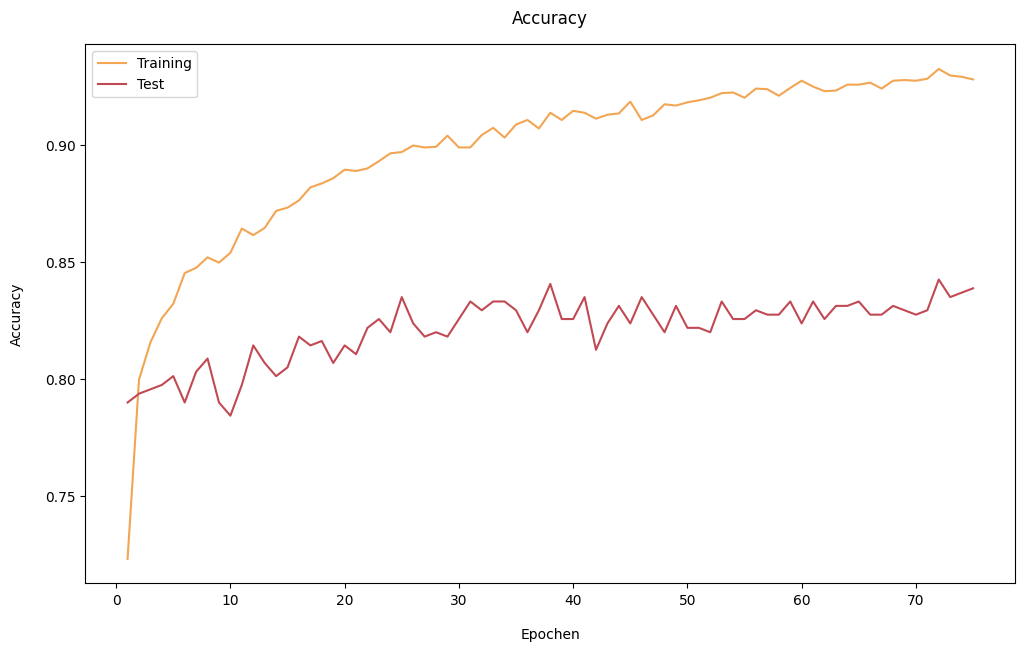

<Figure size 640x480 with 0 Axes>

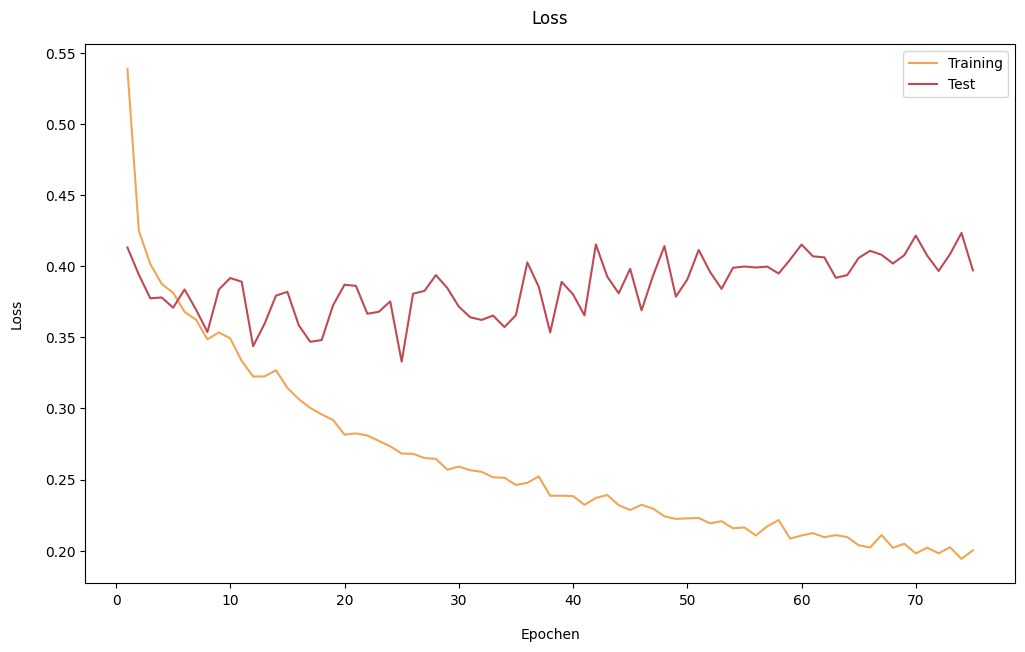

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,7))
plt.plot(epochs, acc, color='#f2a553', label='Training')
plt.plot(epochs, val_acc, 'b', color='#c14953', label='Test')
plt.title('Accuracy', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Accuracy', labelpad = 15)
plt.legend()
plt.figure()

plt.figure(figsize=(12,7))
plt.plot(epochs, loss, color='#f2a553', label='Training')
plt.plot(epochs, val_loss, 'b', color='#c14953', label='Test')
plt.title('Loss', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Loss', labelpad = 15)
plt.legend()
plt.figure

#### 모델평가

In [ ]:
accuracy = model.evaluate(X_train_over, y_train_over, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.2413
Training Accuracy: 0.9114
Testing Score: 0.3329
Testing Accuracy: 0.8349


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


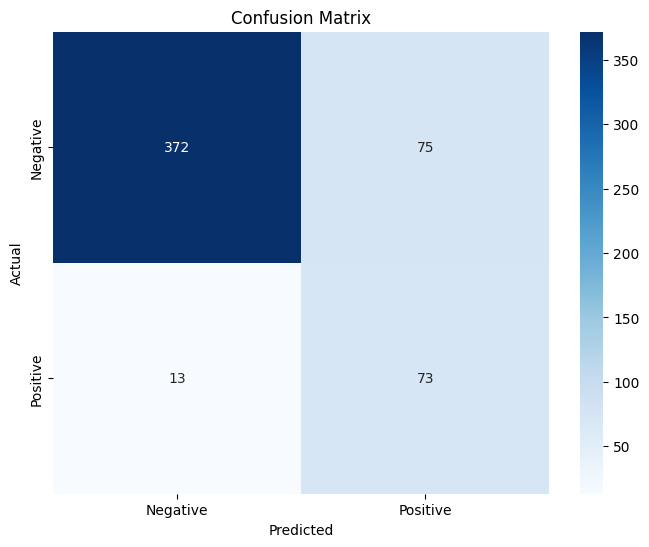

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

tmp = []
col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=['DL Model'])

,accuracy,precision,recall,f1,roc_auc
DL Model,0.834897,0.493243,0.848837,0.623932,0.919151


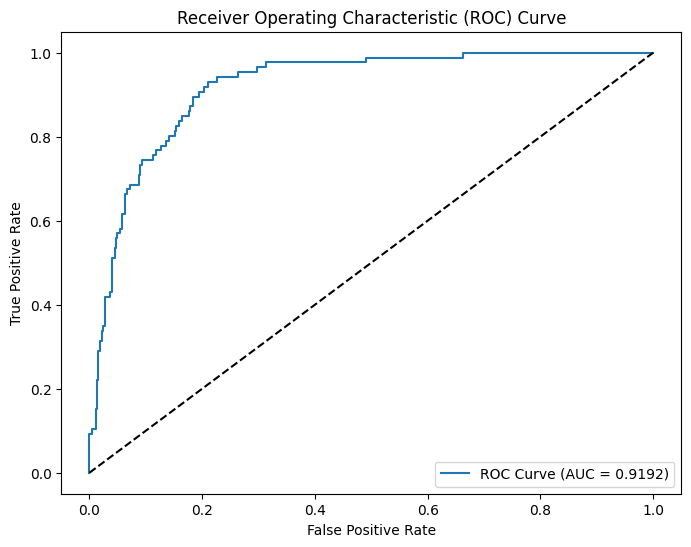

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Downsampling만 적용

In [ ]:
X = df[df.columns.difference(['churn_rate'])]
y = df['churn_rate']

In [ ]:
X.shape, y.shape

((2665, 49), (2665,))

#### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
												  test_size=0.2,
                                                  stratify=y,
												  random_state=13)

In [ ]:
X_train.shape, X_test.shape

((2132, 49), (533, 49))

#### Downsampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=13)
X_train_down, y_train_down = under_sampler.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((2132, 49), (2132,))

In [ ]:
X_train_down.shape, y_train_down.shape

((686, 49), (686,))

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_down, return_counts=True))

(array([0., 1.]), array([1789,  343]))
(array([0., 1.]), array([343, 343]))


#### 모델구조

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()
model.add(layers.Dense(64,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       input_shape=(X_train_down.shape[1],),
                       activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

#### 모델 시각화

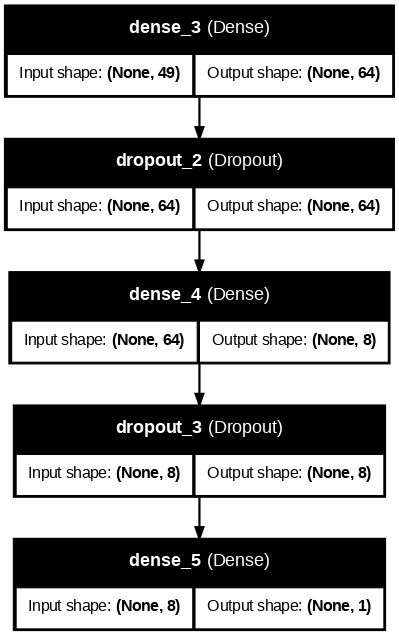

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=80)

#### 학습률 조정

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=(X_train_down.shape[0]/32)*50,
    decay_rate=1,
    staircase=False)
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=70,
                                            restore_best_weights=True)]
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,729 (14.57 KB)

 Trainable params: 3,729 (14.57 KB)

 Non-trainable params: 0 (0.00 B)

#### 학습

In [ ]:
history = model.fit(X_train_down, y_train_down,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=150,
                    callbacks=callback,
                    verbose=1)

Epoch 1/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5161 - loss: 307.1061 - val_accuracy: 0.8386 - val_loss: 35.9527
Epoch 2/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5262 - loss: 131.8516 - val_accuracy: 0.4540 - val_loss: 33.7768
Epoch 3/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5249 - loss: 87.1248 - val_accuracy: 0.5591 - val_loss: 6.6922
Epoch 4/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5978 - loss: 36.7243 - val_accuracy: 0.8386 - val_loss: 2.4249
Epoch 5/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5093 - loss: 24.0541 - val_accuracy: 0.8386 - val_loss: 0.4432
Epoch 6/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5426 - loss: 8.2602 - val_accuracy: 0.3659 - val_loss: 0.7401
Epoch 7/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5354 - loss: 4.7157 - val_accuracy: 0.3602 - val_loss: 0.7035
Epoch 8/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5430 - loss: 4.3850 - val_accuracy: 

#### 학습결과

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

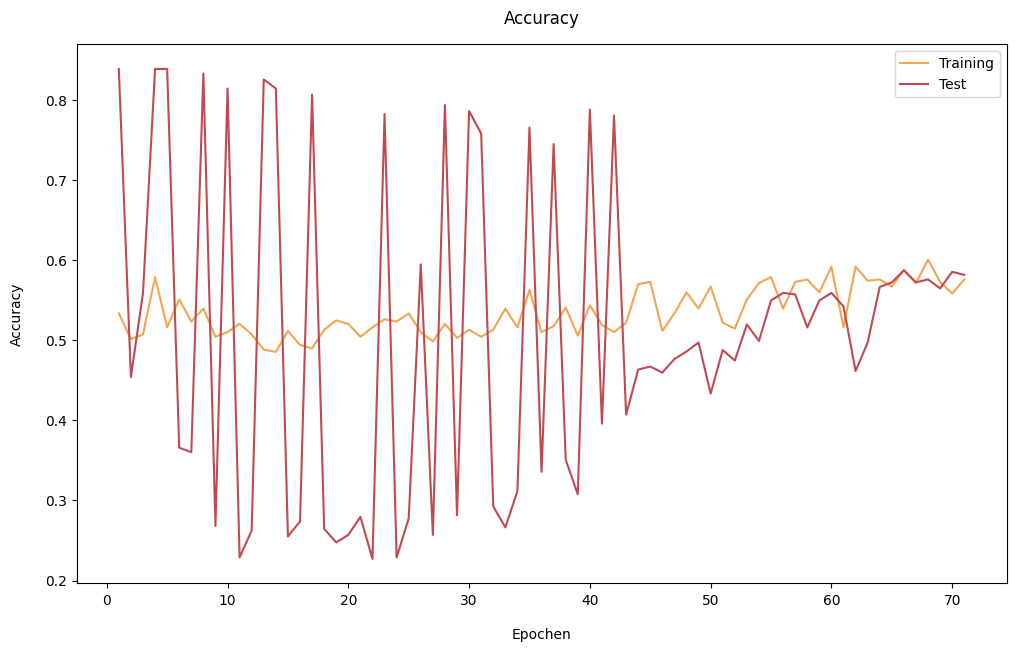

<Figure size 640x480 with 0 Axes>

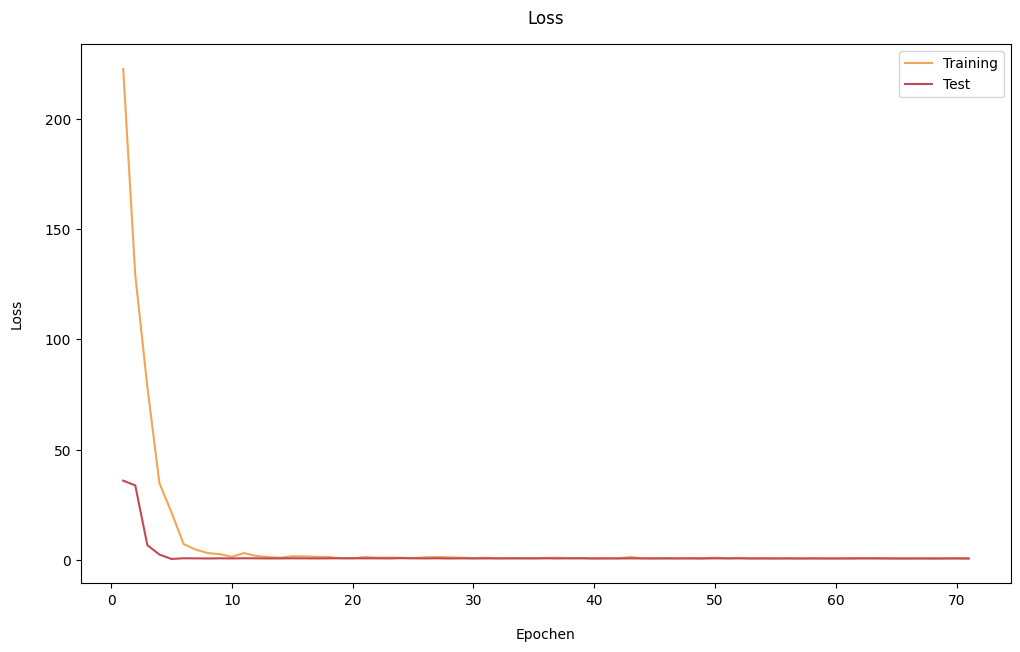

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,7))
plt.plot(epochs, acc, color='#f2a553', label='Training')
plt.plot(epochs, val_acc, 'b', color='#c14953', label='Test')
plt.title('Accuracy', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Accuracy', labelpad = 15)
plt.legend()
plt.figure()

plt.figure(figsize=(12,7))
plt.plot(epochs, loss, color='#f2a553', label='Training')
plt.plot(epochs, val_loss, 'b', color='#c14953', label='Test')
plt.title('Loss', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Loss', labelpad = 15)
plt.legend()
plt.figure

#### 모델평가

In [ ]:
accuracy = model.evaluate(X_train_down, y_train_down, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 117.7906
Training Accuracy: 0.5000
Testing Score: 35.9527
Testing Accuracy: 0.8386


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


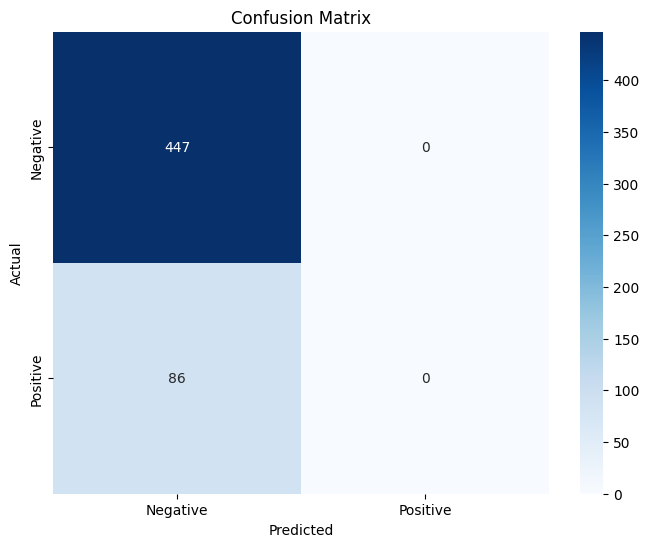

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

tmp = []
col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=['DL Model'])

,accuracy,precision,recall,f1,roc_auc
DL Model,0.838649,0.0,0.0,0.0,0.497763


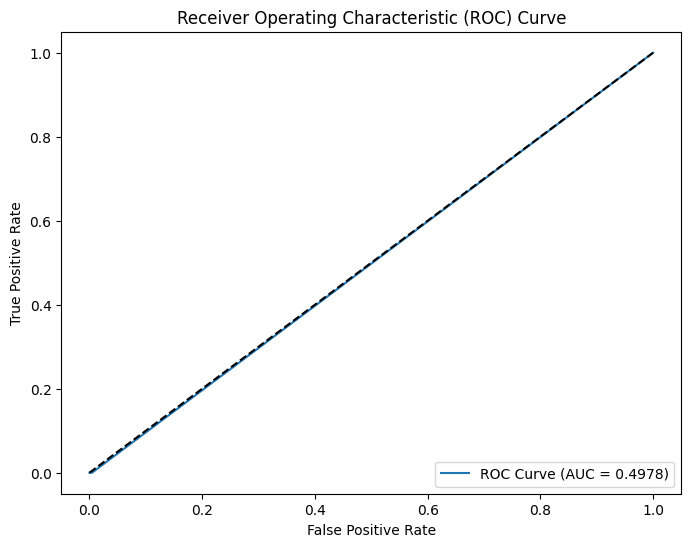

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Robust Scale + Downsampling 적용

In [ ]:
numeric_features = ['tenure', 'TotalCharges', 'CLTV', 'Age', 'Number of Referrals', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']

In [ ]:
from sklearn.preprocessing import RobustScaler

df_scale = df.copy()

scaler = RobustScaler()
df_scale[numeric_features] = scaler.fit_transform(df_scale[numeric_features])

df_scale.head()

,Age,Avg Monthly GB Download,CLTV,Number of Referrals,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,churn_rate,tenure,...,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Unlimited Data_No,Unlimited Data_Yes
2,-0.518519,0.391304,0.403279,0.00,0.0,-0.321094,0.0,-0.261319,1.0,-0.562500,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.814815,1.304348,0.201639,0.00,0.0,-0.290023,0.0,0.323475,1.0,-0.145833,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,1.222222,-0.391304,0.436612,0.00,20.0,-0.397128,0.0,-0.466498,1.0,-0.708333,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,0.111111,0.043478,0.568306,0.00,0.0,-0.159898,0.0,-0.186457,1.0,-0.500000,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
16,1.074074,0.000000,0.365027,0.25,0.0,-0.091428,0.0,-0.310508,1.0,-0.562500,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X = df_scale[df_scale.columns.difference(['churn_rate'])]
y = df_scale['churn_rate']

In [ ]:
X.shape, y.shape

((2665, 49), (2665,))

#### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
												  test_size=0.2,
                                                  stratify=y,
												  random_state=13)

In [ ]:
X_train.shape, X_test.shape

((2132, 49), (533, 49))

#### Downsampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=13)
X_train_down, y_train_down = under_sampler.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((2132, 49), (2132,))

In [ ]:
X_train_down.shape, y_train_down.shape

((686, 49), (686,))

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_down, return_counts=True))

(array([0., 1.]), array([1789,  343]))
(array([0., 1.]), array([343, 343]))


#### 모델구조

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()
model.add(layers.Dense(64,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       input_shape=(X_train_down.shape[1],),
                       activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

#### 모델 시각화

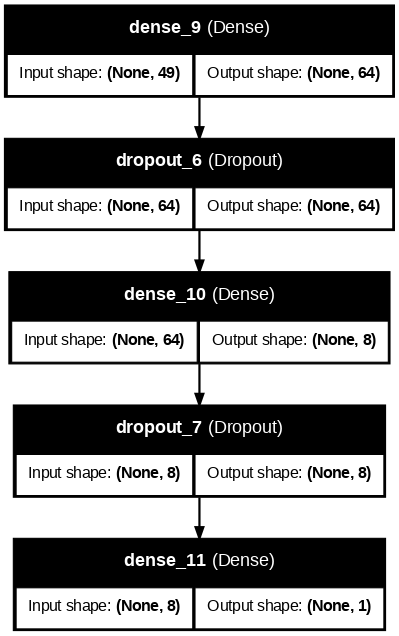

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=80)

#### 학습률 조정

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=(X_train_down.shape[0]/32)*50,
    decay_rate=1,
    staircase=False)
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
                                            restore_best_weights=True)]
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,729 (14.57 KB)

 Trainable params: 3,729 (14.57 KB)

 Non-trainable params: 0 (0.00 B)

#### 학습

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
history = model.fit(X_train_down, y_train_down,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=150,
                    callbacks=[callback, checkpoint],
                    verbose=1)

Epoch 1/150
 1/22 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5312 - loss: 0.8674
Epoch 1: val_loss improved from inf to 0.60090, saving model to best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5455 - loss: 0.7874 - val_accuracy: 0.6492 - val_loss: 0.6009
Epoch 2/150
 1/22 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.6562 - loss: 0.9970
Epoch 2: val_loss improved from 0.60090 to 0.56419, saving model to best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6660 - loss: 0.7659 - val_accuracy: 0.6773 - val_loss: 0.5642
Epoch 3/150
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7524 - loss: 0.6713 
Epoch 3: val_loss improved from 0.56419 to 0.55320, saving model to best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7460 - loss: 0.6714 - val_accuracy: 0.6604 - val_loss: 0.5532
Epoch 4/150
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7420 - loss: 0.5804 
Epoch 4: val_loss improved from 0.55320 to 0.51458, saving

#### 학습결과

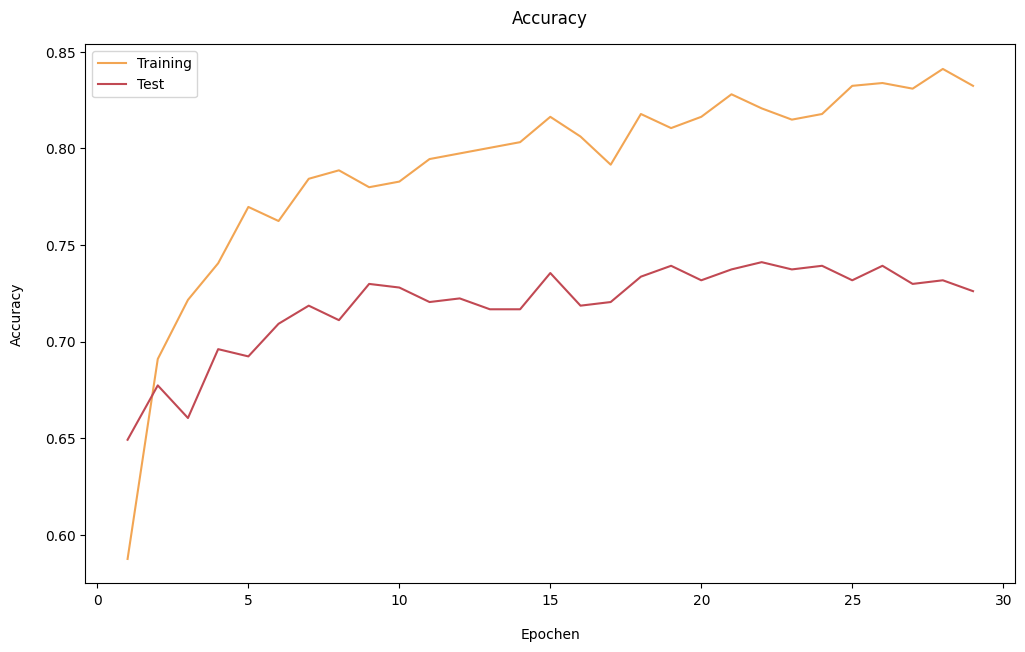

<Figure size 640x480 with 0 Axes>

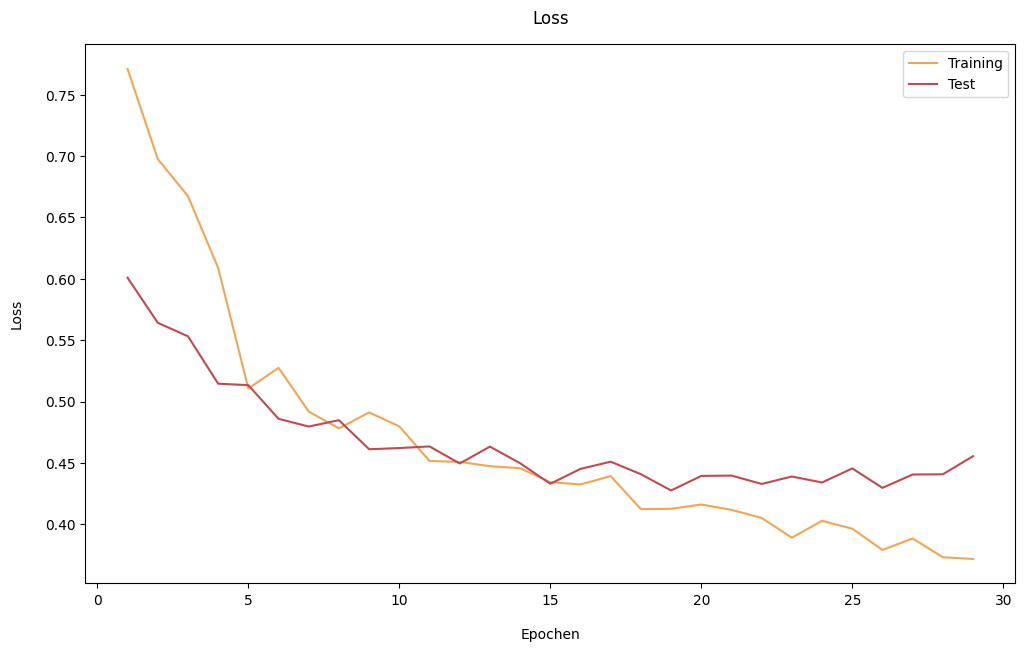

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,7))
plt.plot(epochs, acc, color='#f2a553', label='Training')
plt.plot(epochs, val_acc, 'b', color='#c14953', label='Test')
plt.title('Accuracy', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Accuracy', labelpad = 15)
plt.legend()
plt.figure()

plt.figure(figsize=(12,7))
plt.plot(epochs, loss, color='#f2a553', label='Training')
plt.plot(epochs, val_loss, 'b', color='#c14953', label='Test')
plt.title('Loss', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Loss', labelpad = 15)
plt.legend()
plt.figure

plt.show()

#### 모델평가

In [ ]:
accuracy = model.evaluate(X_train_down, y_train_down, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.3715
Training Accuracy: 0.8397
Testing Score: 0.4276
Testing Accuracy: 0.7392


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


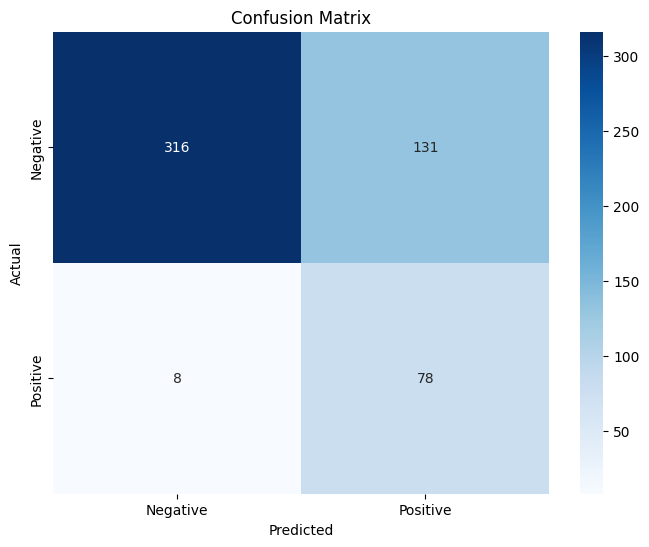

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

tmp = []
col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=['DL Model'])

,accuracy,precision,recall,f1,roc_auc
DL Model,0.819887,0.467532,0.837209,0.6,0.908199


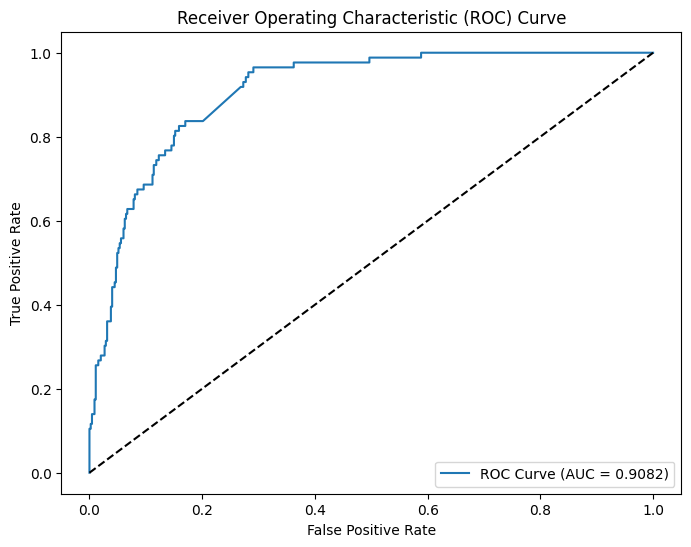

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()